<a href="https://colab.research.google.com/github/Ale-PerazaGlez/BreastCancerKaggle/blob/main/ProyectoDatosTID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TID - Proyecto de Datos - Cáncer de Mama**

## **Participantes**

Este proyecto ha sido realizado por:

- #### **Jorge Acevedo de León** - *alu0101123622@ull.edu.es*
- #### **José Daniel Escánez Expósito** - *alu0101230944@ull.edu.es*
- #### **Alejandro Peraza González** - *alu0101211770@ull.edu.es*
- #### **Nerea Rodríguez Hernández** - *alu0101215693@ull.edu.es*

---

## Introducción

El objeto de estudio es el **cáncer de mama**, un tipo de cáncer que se forma en las células de las mamas. Los médicos saben que el cáncer de mama ocurre cuando algunas células mamarias comienzan a crecer de manera anormal. Estas células se dividen más rápido que las células saludables y continúan acumulándose, formando un bulto o masa. Las células pueden diseminarse (hacer metástasis) por la mama hasta los ganglios linfáticos o a otras partes del cuerpo.

Desarrollando este proyecto, es nuestra meta ser capaces de predecir si una muestra de neoplasia se trata de un tejido maligno o benigno.

Un tumor es benigno cuando este sigue generando e imitando células normales que no invaden al organismo, como contrapartida, un tumor maligno se da cuando la reproducción celular es descontrolada y desordenada. Entonces estamos ante un cáncer que crece e invade otras zonas del cuerpo.

Es por esto que es de gran ayuda para la medicina poder clasificar un tumor entre estas dos categorías mediante una muestra de tejido del mismo.

---

- **¿Podemos predecir qué muestras son malignas?**
- **¿De qué depende que lo sean?**

---

## Conjunto de datos

En este documento se efectuará el análisis, agrupamiento y clasificación de los datos pertenecientes al siguiente [dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) alojado en Kaggle. En dicho dataset se recopila información sobre características de la mama que podrían ser indicadores de tumores, y, en concreto, de tumores **benignos** o **malignos**.

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria y describen las características de los núcleos celulares presentes en dicha imagen.

Información de atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32)

Se calculan diez características de valor real para cada núcleo celular:
- a) radio (media de las distancias del centro a los puntos del perímetro)
- b) textura (desviación estándar de los valores en escala de grises)
- c) perímetro
- d) área
- e) suavidad (variación local de las longitudes de los radios)
- f) compacidad (perímetro^2 / área - 1,0)
- g) concavidad (gravedad de las partes cóncavas del contorno)
- h) puntos cóncavos (número de porciones cóncavas del contorno)
- i) simetría
- j) dimensión fractal ("aproximación a la línea de costa" - 1)

Se calcularon la media, el error estándar y el "peor" o mayor (media de los tres
de los tres valores más grandes) de estas características para cada imagen,
lo que dio lugar a 30 características. Por ejemplo, el campo 3 es el Radio Medio, el campo
13 es el Error Estándar del Radio y el campo 23 es el Peor Radio.

Todos los valores de las características se recodifican con cuatro dígitos significativos.

## **Carga de datos y librerías**

In [ ]:
# Se importan las librerías necesarias, probablemente la lista siga creciendo a
# medida que se desarrolla el proyecto.

import sklearn.tree as tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from operator import itemgetter
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import copy
from datetime import datetime

# Librerías utilizadas para agrupamiento basado en prototipos
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Librerías utilizadas para agrupamiento jerárquico
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, KMeans
import sklearn.metrics as sm

# Librería utilizada para agrupamiento basado en densidad
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

# Librerías utilizadas para MLP
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Librerías utilizadas para SOM
import matplotlib.gridspec as gridspec

## Instalamos neupy debido a que no está instalada por defecto en Google Colab
!sudo pip install neupy
from neupy import algorithms, utils, init, plots

Para cargar los datos del proyecto debemos hacerlo con *pandas* y no importandolo como módulo, ya que dichos datos se encuentran en un repositorio de GitHub, de forma que Google Colab sea capaz de acceder a ellos cada vez que algún miembro del grupo pueda ejecutar el código desde su propio entorno de ejecución.

> El repositorio en cuestión esta en la cuenta de GitHub de Jorge Acevedo de León y cuenta con visibilidad pública: [breast-cancer-data](https://github.com/alu0101123622/breast-cancer-csv)

In [ ]:
# Almacenamos el url del repo en una variable.
data_repo_url = 'https://raw.githubusercontent.com/alu0101123622/breast-cancer-csv/main/data.csv'

# Cargamos los datos como un nuevo DataFrame de Pandas. (Breast Cancer DataFrame - bc_df)
bc_df = pd.read_csv(data_repo_url)

# Eliminamos la columna de nombre 'Unannmed', residuo del funcionamiento de lectura
# así como la columna id ya que no aporta ningún valor a los datos.
bc_df.drop(bc_df.filter(regex="Unnamed"), axis=1, inplace=True)
bc_df.drop(['id'], axis=1, inplace=True)
bc_df

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

### **Preparación y visualización de los datos**

Con el fin de asegurarnos de que los datos han sido cargados correctamente y para empezar a familiariazarnos con el formato de los mismos, comenzaremos por mostrar un pequeño fragmento de los datos cargados, comprobando que el número de características (columnas) y sus valores encajan con los esperados.

In [ ]:
bc_df.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

Aunque en la página de Kaggle del dataset con el que estamos trabajando se nos informa de que **no** existen valores **nulos** o **no observados**, no está demas comprobarlo, eliminando todos los valores nulos del DataFrame.

In [ ]:
bc_df.dropna()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

### **Normalización**



Con el objetivo de alcanzar una homogeneidad entre los datos del conjunto, hemos creído apropiado efectuar normalización aplicando min-max scaling.

También conocido como escalado mínimo-máximo o normalización mínima-máxima, es el método más sencillo y consiste en reescalar el rango de características para escalar el rango en [0, 1] o [-1, 1]. La selección del rango objetivo depende de la naturaleza de los datos. La fórmula general para un mínimo-máximo de [0, 1] se da como:

$$ x' = \dfrac{x- min(x)} { max(x) - min(x)} $$

In [ ]:
features = bc_df.loc[:, bc_df.columns != 'diagnosis']
features = (features - features.min()) / (features.max() - features.min())

bc_df.loc[:, bc_df.columns != 'diagnosis'] = features

bc_df.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M     0.521037  ...        0.598462                 0.418864
1         M     0.643144  ...        0.233590                 0.222878
2         M     0.601496  ...        0.403706                 0.213433
3         M     0.210090  ...        1.000000                 0.773711
4         M     0.629893  ...        0.157500                 0.142595

[5 rows x 31 columns]

Para ver un análisis estadístico simple de los datos, utilizamos el equivalente en **pandas** a la función **summary** de **R**. Pese a esto, teniendo en cuenta que son 30 características que, carecen de un significado real para nosotros, poca información podemos extraer ahora mismo de este estadístico, *sin embargo*, como veremos más adelante nos serán de gran utilidad para la síntesis de las conclusiones del proyecto.

In [ ]:
bc_df.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean      0.338222      0.323965  ...        0.263307                 0.189596
std       0.166787      0.145453  ...        0.121954                 0.118466
min       0.000000      0.000000  ...        0.000000                 0.000000
25%       0.223342      0.218465  ...        0.185098                 0.107700
50%       0.302381      0.308759  ...        0.247782                 0.163977
75%       0.416442      0.408860  ...        0.318155                 0.242949
max       1.000000      1.000000  ...        1.000000                 1.000000

[8 rows x 30 columns]

A la hora de la visualización de los datos mediante gráficos, nos enfrentamos al recurrente problema (*y ventaja*) de que el dataset cuenta con **30** características, difícilmente visualizables simultáneamente de forma clara. Además, ya que esta visualización de datos se está efectuando previamente al estudio, tampoco pertenece a nuestro conocimiento una ponderación de qué datos son los **más importantes** a la hora de hacer la predicción. 

Algo que si podemos hacer es una comparación de los tumores benignos/malignos del conjunto de datos total.


### **Radio del tumor en relación benigno maligno**

Podemos visualizar el impacto de la característica *radius_mean* (mediana del radio) para comprobar si existe una correlación entre dicho radio y el valor del resultado final (benigno/maligno)

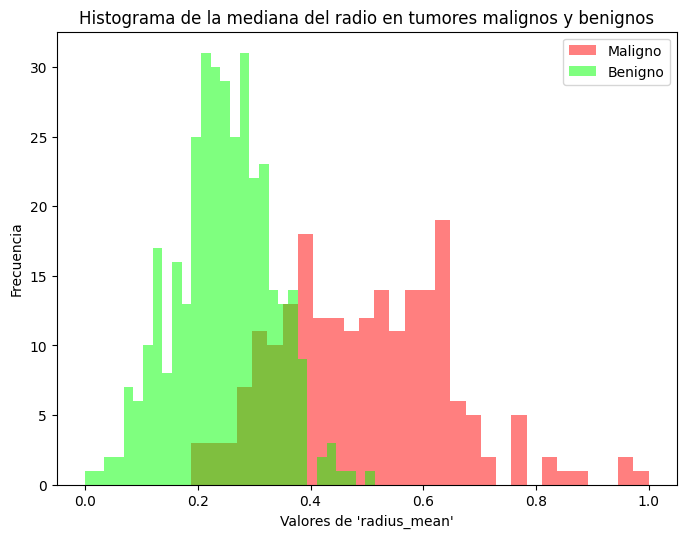

In [ ]:
plt.figure(num=None, figsize=(8,6), dpi=100)

m = plt.hist(bc_df[bc_df["diagnosis"] == "M"].radius_mean, bins=30,
             fc = (1,0,0,0.5), label = "Maligno")

b = plt.hist(bc_df[bc_df["diagnosis"] == "B"].radius_mean, bins=30,
             fc = (0,1,0,0.5), label = "Benigno")

plt.legend()
plt.xlabel("Valores de 'radius_mean'")
plt.ylabel("Frecuencia")
plt.title("Histograma de la mediana del radio en tumores malignos y benignos")
plt.show()





### **Visualización de la correlación entre variables**

En la siguiente gráfica mostramos la correlación entre las variables (a excepción de la variable de diagnóstico) para poder analizar si existen variables que nos interesen agrupar.

Podemos apreciar que las que están matemáticamente relacionadas también lo están estadísticamente, como es el caso de `radius_mean` y `radius_worst`.

Por otro lado, observando las variables `compactness_mean`, `concavity_mean` y `concave points_mean` se puede extraer que están altamente correlacionadas con parte del resto de variables.

In [ ]:
ix = bc_df.corr().sort_values('radius_mean', ascending=False).index
bc_df_sorted = bc_df.loc[:, ix]


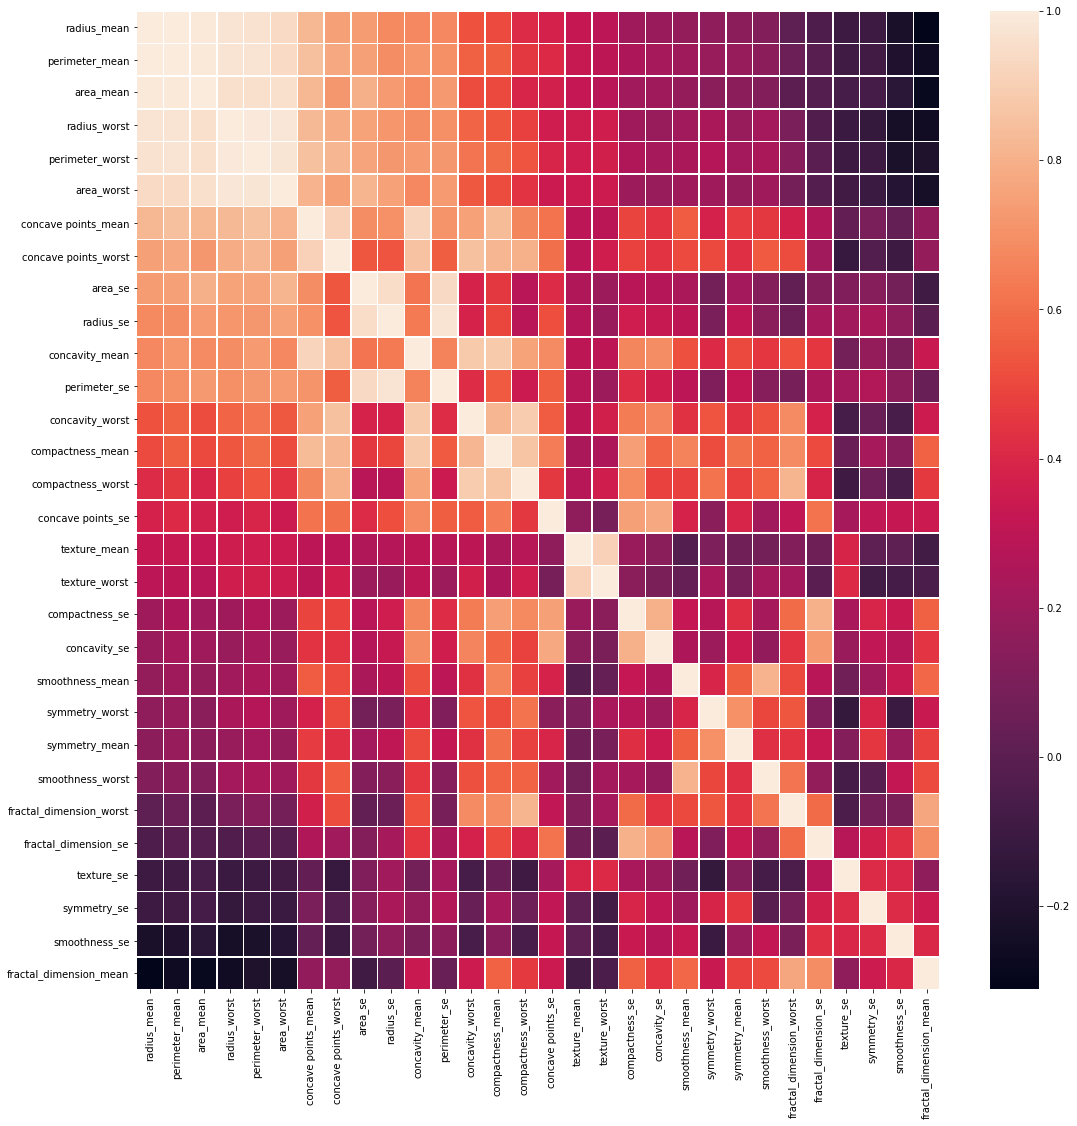

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(bc_df_sorted.corr(), linewidths=.5, fmt= '.1f', ax=ax)

### **Escición del conjunto de datos**

Separaremos los datos en:
 - Parte para el aprendizaje del modelo
 - Parte para las pruebas

In [ ]:
bc_df_targets =  bc_df['diagnosis']
bc_df_features = bc_df.drop('diagnosis', 1)

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(bc_df_features, bc_df_targets, test_size=0.30)

## **Clasificación**


La tarea de clasificación consiste en la asignación de elementos a una de las clases previamente definidas.

Para llevar a cabo esta tarea, se dispone de un conjunto de elementos caracterizados por el par de atributos (x, y), donde x es un vector de características e y es la conocida como marca de clase.

Se plantean los modelos de: Árbol  de  decisión y  clasificador bayesiano. Se validan sendos clasificadores, validando sus resultados.

### **Árbol de decisión**

Dado un árbol de decisión, se clasifica una nueva instancia inspeccionando el mismo desde la raíz hasta llegar a un nodo hoja. Cada nodo se corresponde con un test sobre un atributo de la instancia a inspeccionar. En las hojas del árbol se encuentran valores de la marca de clase.

#### **Árbol con los datos iniciales**

Creamos el clasificador con el árbol de decisión gracias a la función `tree.DecisionTreeClassifier()` de `sklearn.tree` y lo ajustamos con los datos de entrenamiento con la función `fit` de la misma librería.

In [ ]:
initial_decision_tree = tree.DecisionTreeClassifier(max_depth=4)
initial_decision_tree.fit(train_data, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Se muestra la importancia de las diferentes variables en el árbol entrenado gracias al atributo `feature_importances_` de nuestro árbol inicial

In [ ]:
feature_importances = {}
for i in range(len(features.columns)):
  feature_importances[features.columns[i]] = initial_decision_tree.feature_importances_[i]

tags_pie = []; value_pie = []
for key, value in sorted(feature_importances.items(), key = itemgetter(1), reverse = True):
  print(key, value)
  if value != 0.0:
    tags_pie.append(key)
    value_pie.append(value)

concave points_worst 0.7418986859668625
radius_worst 0.15204272179988865
concave points_mean 0.03488679491360683
area_worst 0.02432305074076272
texture_mean 0.013419991758036194
concavity_worst 0.011402912372289584
symmetry_mean 0.011011303644948586
fractal_dimension_worst 0.008774632592068402
radius_se 0.0022399062115365546
radius_mean 0.0
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.0
compactness_mean 0.0
concavity_mean 0.0
fractal_dimension_mean 0.0
texture_se 0.0
perimeter_se 0.0
area_se 0.0
smoothness_se 0.0
compactness_se 0.0
concavity_se 0.0
concave points_se 0.0
symmetry_se 0.0
fractal_dimension_se 0.0
texture_worst 0.0
perimeter_worst 0.0
smoothness_worst 0.0
compactness_worst 0.0
symmetry_worst 0.0


Representación de las variables importantes según su importancia:

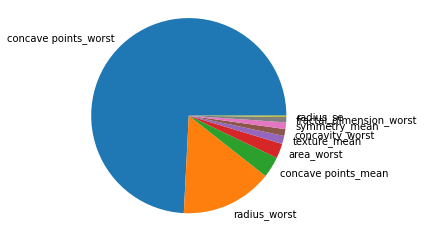

In [ ]:
plt.pie(value_pie, labels=tags_pie)
plt.axis("equal")
plt.show()

Represantamos el árbol obtenido gracias al método `tree.plot_tree`:

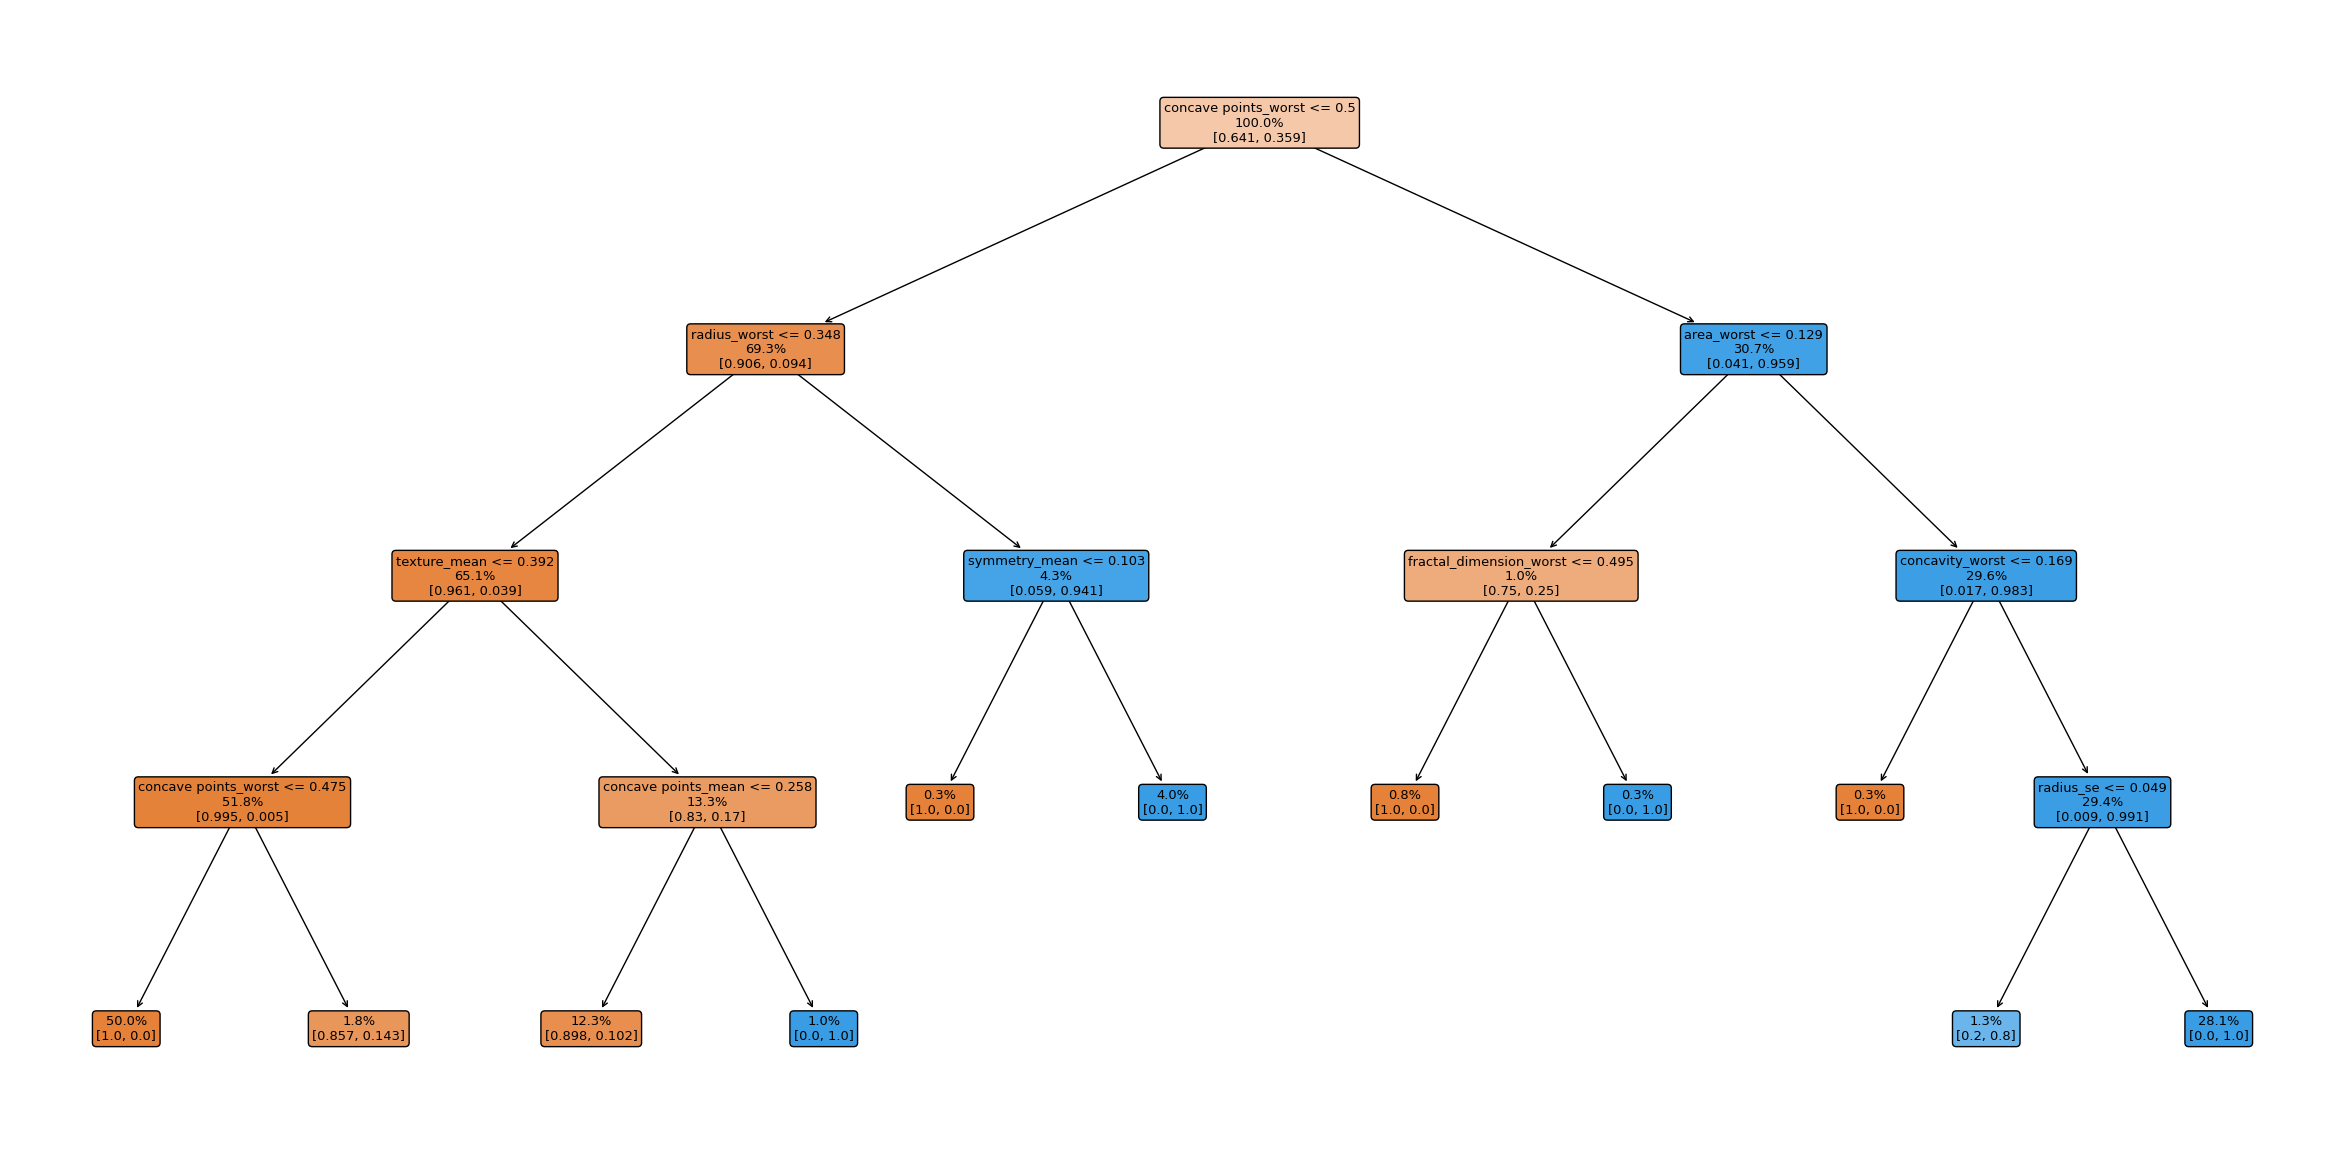

In [ ]:
figure = plt.figure(num=None, figsize=(30,15), dpi=100)
tree.plot_tree(initial_decision_tree, feature_names=list(bc_df_features.columns), rounded=True, filled=True, impurity=False, proportion=True, node_ids=False, label="none" )
figure.savefig("decistion_tree.png")


In [ ]:
ac_tree = accuracy_score(test_targets,initial_decision_tree.predict(test_data))
print('Accuracy is: ',ac_tree)

Accuracy is:  0.9473684210526315


Como vemos, un valor percentual de precisión mayor al 90% es bastante más de los esperado, habiendo utilizado un método tan directo sobre el conjunto de datos.

Utilizamos validación cruzada para evaluar la bondad de la estructura de árbol de decisión cuando se generaliza para una mayor población.

In [ ]:
cross_validation_results = cross_validate(initial_decision_tree, test_data, test_targets, cv=10)
print(cross_validation_results['test_score'])
np.mean(cross_validation_results['test_score'])

[0.94444444 1.         0.88235294 0.88235294 0.94117647 0.94117647
 0.94117647 1.         0.76470588 0.88235294]


0.9179738562091504

Se calcula la matriz de confusión, para verificar que no genera un gran número de falsos negativos.

In [ ]:
confusion_matrix(test_targets,initial_decision_tree.predict(test_data))

array([[100,   2],
       [  7,  62]])

#### **Árbol con los datos considerados relevantes**

Dados los resultados obtenidos, vemos que podríamos eliminar algunas variables que solo ofrecen información redundante, como por ejemplo *radius_mean* con *texture_mean*, *perimeter_mean* y *area_mean*. Para ello, eliminaremos las que tengan mayor correlación entre ellas.

De esta manera se pretende reducir la complejidad del sistema, sin afectar demasiado a la calidad de los resultados.

In [ ]:
def deleteCorr(features, corr):
  result = features.copy()
  drop_list = []
  for row in result.iterrows():
    for col in result.columns:
      if row[0] != col and row[1][col] >= corr:
        result.drop([col], axis=0, inplace=True)
        result.drop([col], axis=1, inplace=True)
        drop_list.append(col)

  print('Variables eliminadas: ' + str(drop_list))
  return result, drop_list

reducedFeatures, drop_list = deleteCorr(features.corr(), 0.925)
reducedFeatures

Variables eliminadas: ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'radius_mean', 'perimeter_se', 'area_se', 'radius_se']


texture_mean  ...  fractal_dimension_worst
texture_mean                 1.000000  ...                 0.119205
smoothness_mean             -0.023389  ...                 0.499316
compactness_mean             0.236702  ...                 0.687382
concavity_mean               0.302418  ...                 0.514930
concave points_mean          0.293464  ...                 0.368661
symmetry_mean                0.071401  ...                 0.438413
fractal_dimension_mean      -0.076437  ...                 0.767297
texture_se                   0.386358  ...                -0.045655
smoothness_se                0.006614  ...                 0.101480
compactness_se               0.191975  ...                 0.590973
concavity_se                 0.143293  ...                 0.439329
concave points_se            0.163851  ...                 0.310655
symmetry_se                  0.009127  ...                 0.078079
fractal_dimension_se         0.054458  ...                 0.591328
texture_worst                0.912045  ...                 0.219122
smoothness_worst             0.077503  ...                 0.617624
compactness_worst            0.277830  ...                 0.810455
concavity_worst              0.301025  ...                 0.686511
concave points_worst         0.295316  ...                 0.511114
symmetry_worst               0.105008  ...                 0.537848
fractal_dimension_worst      0.119205  ...                 1.000000

[21 rows x 21 columns]

Eliminamos variables que consideramos redundantes, como magnitudes físicas que tienen correlaciones cercanas a 1.

In [ ]:
bc_df_reduced = bc_df.drop(drop_list,axis = 1)
bc_df_reduced.head()

diagnosis  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0         M      0.022658  ...        0.598462                 0.418864
1         M      0.272574  ...        0.233590                 0.222878
2         M      0.390260  ...        0.403706                 0.213433
3         M      0.360839  ...        1.000000                 0.773711
4         M      0.156578  ...        0.157500                 0.142595

[5 rows x 22 columns]

In [ ]:
bc_df_reduced_targets =  bc_df_reduced['diagnosis']
bc_df_reduced_features = bc_df_reduced.drop('diagnosis', 1)

In [ ]:
reduced_train_data, reduced_test_data, reduced_train_targets, reduced_test_targets = train_test_split(bc_df_reduced_features, bc_df_reduced_targets, test_size=0.30)

Generamos un nuevo árbol con un número más restrigido de variables (eliminando información redundante).

In [ ]:
reduced_decision_tree = tree.DecisionTreeClassifier(max_depth=4)
reduced_decision_tree.fit(reduced_train_data, reduced_train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Se muestra la importancia de las diferentes variables en el árbol entrenado gracias al atributo `feature_importances_` de nuestro árbol con el número reducido de variables:

In [ ]:
reduced_feature_importances = {}
for i in range(len(reducedFeatures.columns)):
  reduced_feature_importances[reducedFeatures.columns[i]] = reduced_decision_tree.feature_importances_[i]

reduced_tags_pie = []; reduced_value_pie = []
for key, value in sorted(reduced_feature_importances.items(), key = itemgetter(1), reverse = True):
  print(key, value)
  if value != 0.0:
    reduced_tags_pie.append(key)
    reduced_value_pie.append(value)

concave points_mean 0.7642634589793126
texture_worst 0.053632752484377405
concavity_worst 0.053121782394956706
concave points_worst 0.045683888601997416
concavity_se 0.03407095040927967
smoothness_mean 0.014960927314376996
smoothness_se 0.011876788959139817
symmetry_worst 0.01176630720138058
symmetry_mean 0.010623143655178937
texture_mean 0.0
compactness_mean 0.0
concavity_mean 0.0
fractal_dimension_mean 0.0
texture_se 0.0
compactness_se 0.0
concave points_se 0.0
symmetry_se 0.0
fractal_dimension_se 0.0
smoothness_worst 0.0
compactness_worst 0.0
fractal_dimension_worst 0.0


Representación de las variables importantes según su importancia:

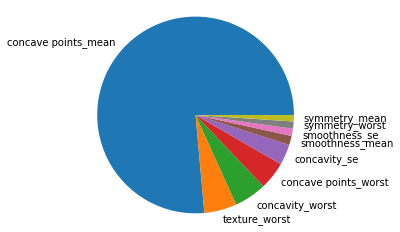

In [ ]:
plt.pie(reduced_value_pie, labels=reduced_tags_pie)
plt.axis("equal")
plt.show()

Represantamos el árbol obtenido gracias al método `tree.plot_tree`:

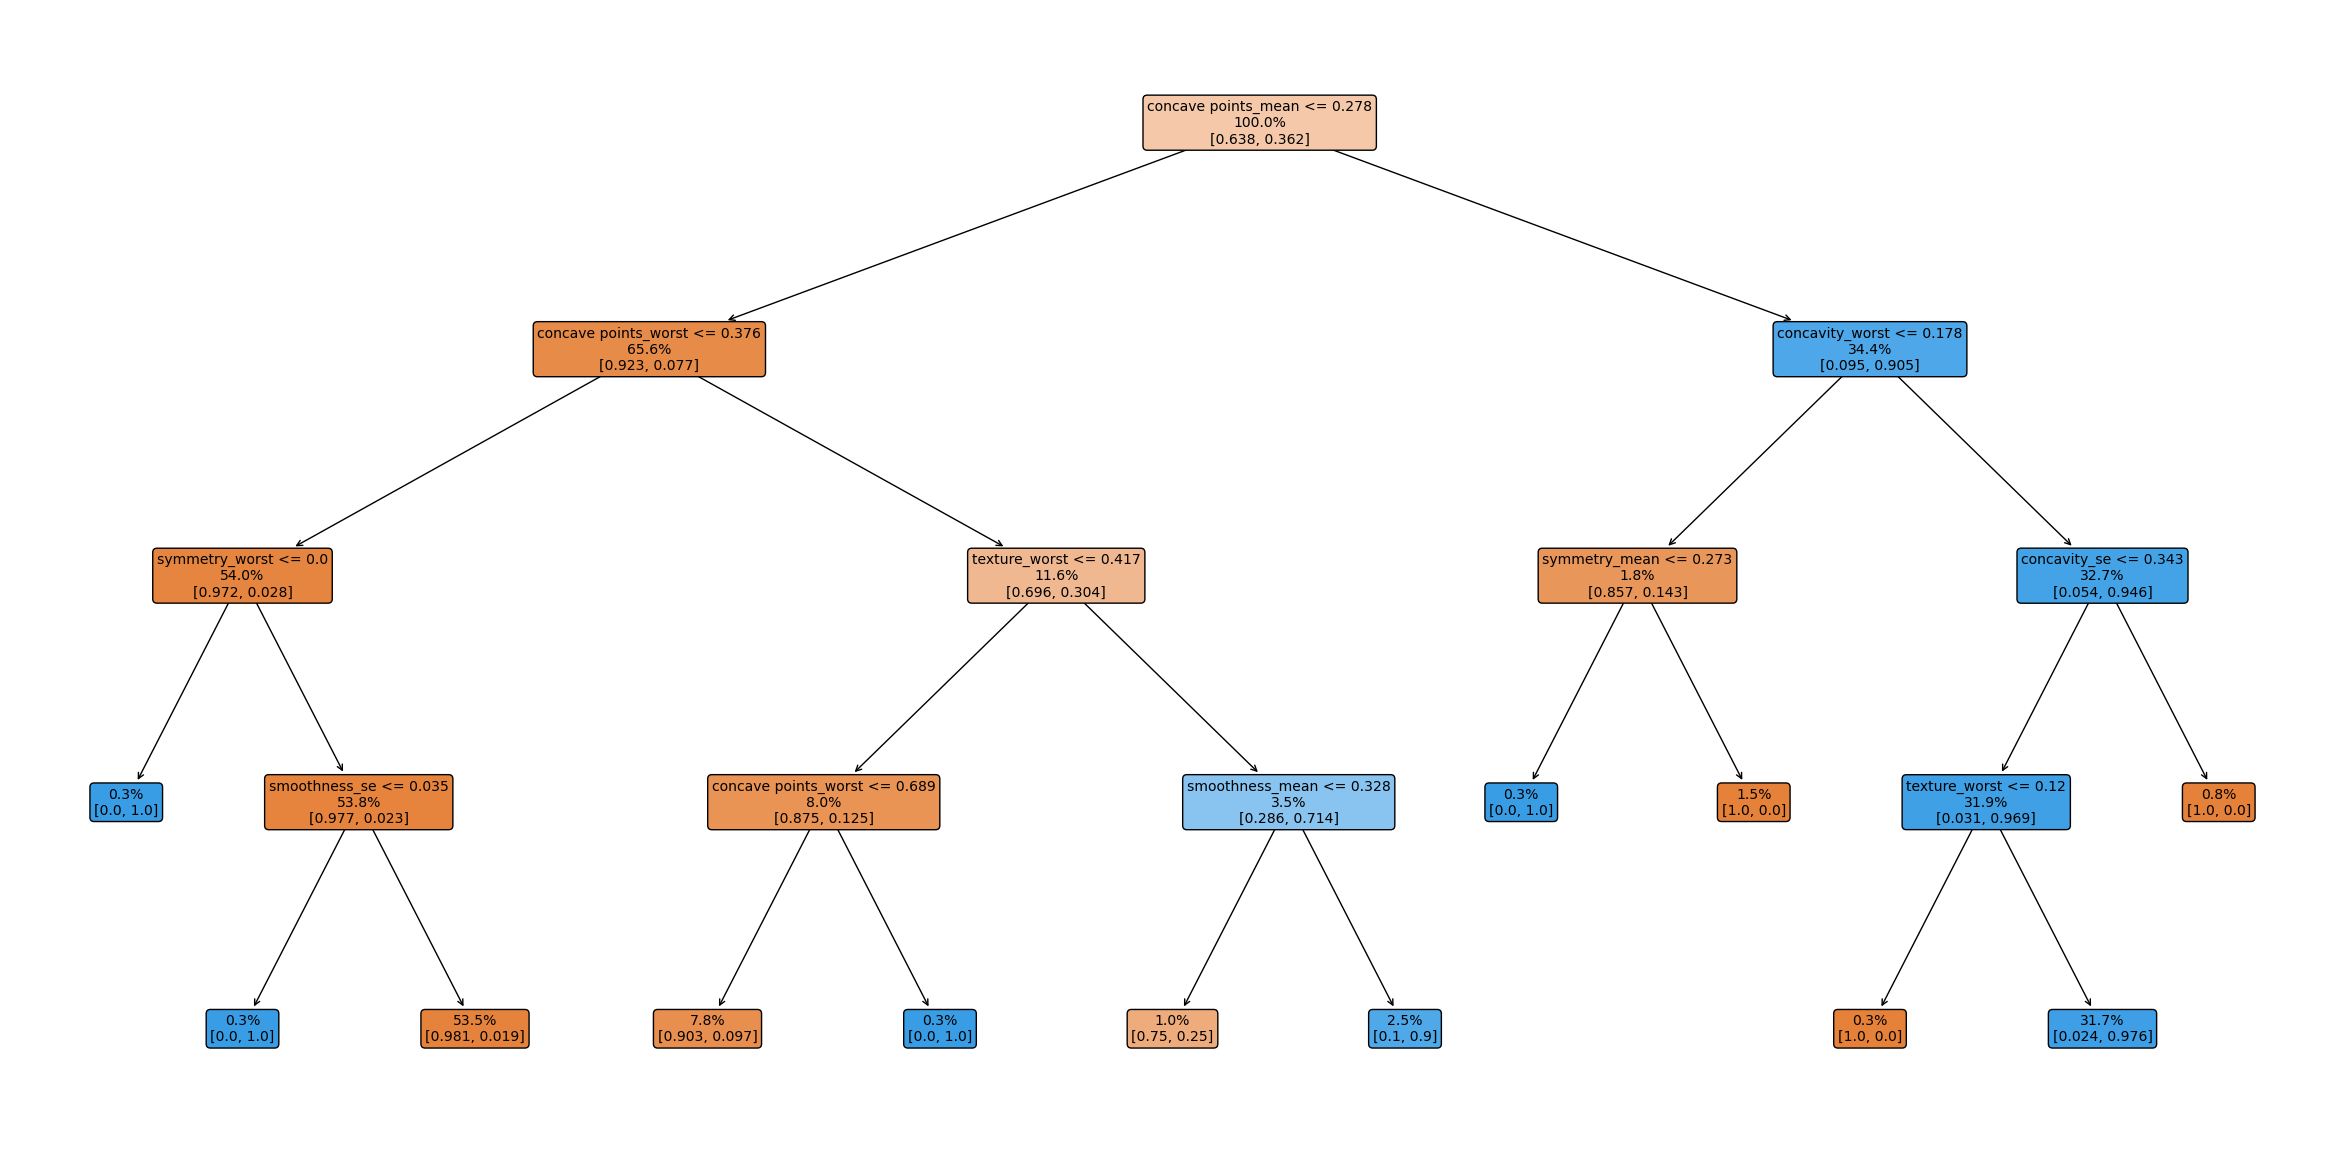

In [ ]:
figure = plt.figure(num=None, figsize=(30,15), dpi=100)
tree.plot_tree(reduced_decision_tree, feature_names=list(bc_df_reduced_features.columns), rounded=True, filled=True, impurity=False, proportion=True, node_ids=False, label="none" )
figure.savefig("decistion_tree_v2.png")

Calculamos la precisión de este nuevo árbol:

In [ ]:
reduced_ac_tree = accuracy_score(reduced_test_targets,reduced_decision_tree.predict(reduced_test_data))
print('Accuracy is: ',reduced_ac_tree)

Accuracy is:  0.9122807017543859


Al compararlo con el árbol inicial, podemos concluir que se obtiene una precisión muy similar, habiendo conseguido reducir el número de variables, y por tanto, la complejidad del sistema. 

Matriz de correlación con los datos considerados "relevantes":

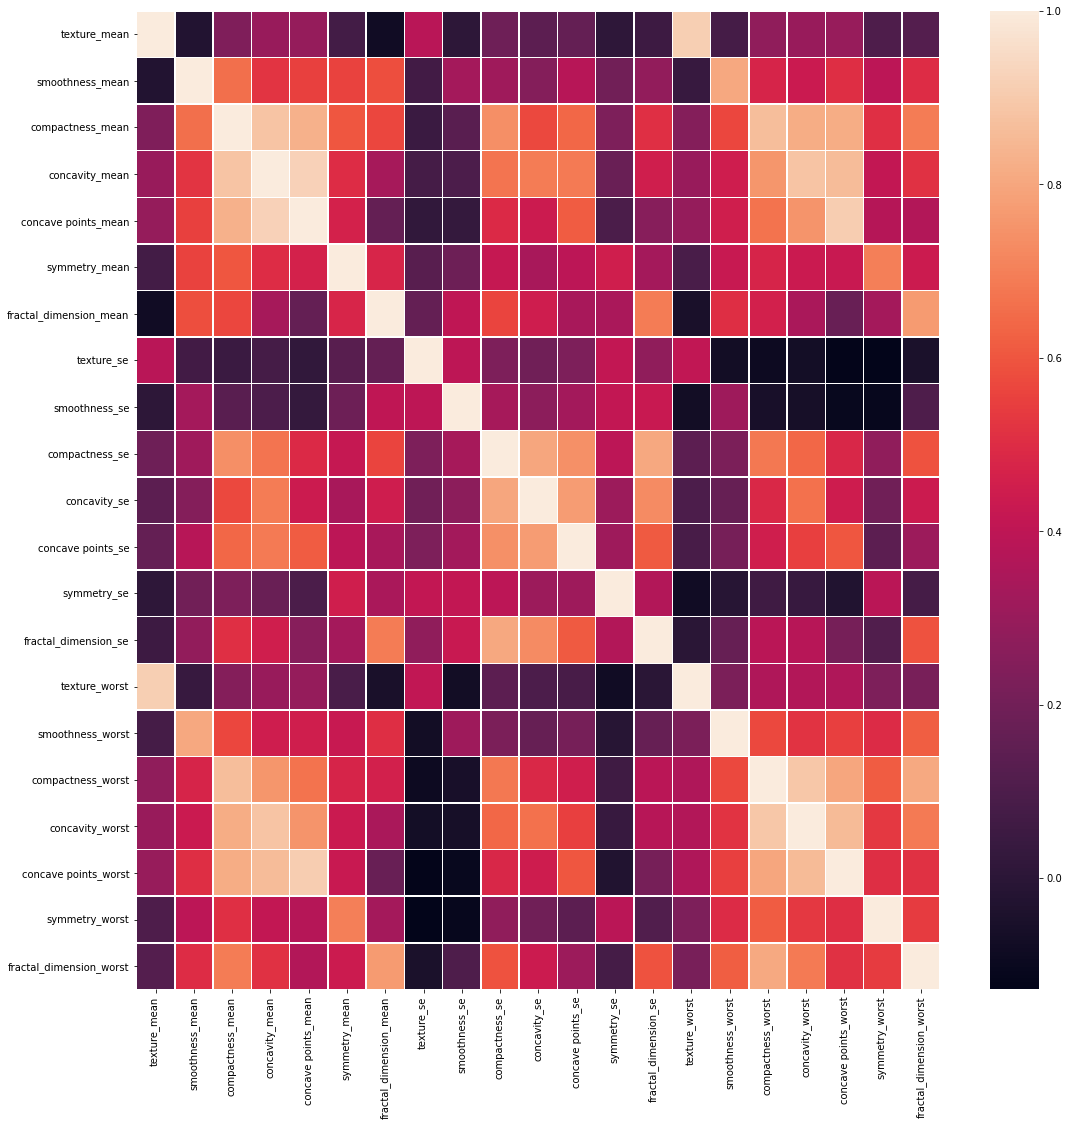

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(bc_df_reduced.corr(), linewidths=.5, fmt= '.1f', ax=ax)

Utilizamos validación cruzada para evaluar la bondad de la estructura de árbol de decisión cuando se generaliza para una mayor población.

In [ ]:
reduced_cross_validation_results = cross_validate(reduced_decision_tree, reduced_test_data, reduced_test_targets, cv=10)
print(reduced_cross_validation_results['test_score'])
np.mean(reduced_cross_validation_results['test_score'])

[0.83333333 0.82352941 1.         0.94117647 0.94117647 0.94117647
 0.94117647 0.88235294 0.88235294 0.94117647]


0.9127450980392157

Se calcula la matriz de confusión, para verificar que no genera un gran número de falsos negativos.

In [ ]:
confusion_matrix(reduced_test_targets,reduced_decision_tree.predict(reduced_test_data))

array([[96,  7],
       [ 8, 60]])

### Clasificador bayesiano


Es un clasificador probabilístico fundamentado en el teorema de Bayes y algunas hipótesis simplificadoras adicionales.

Definimos el modelo gracias a la función `GaussianNB` de la librería `sklearn.naive_bayes`. La ajustamos con los datos de entrenamiento con el método `fit` de la misma librería. A continuación, realizamos una predicción sobre los datos de prueba y evaluamos la predicción, comparándola con la marca de clase real gracias al método `accuracy_score` de la librería `sklearn.naive_bayes`.


In [ ]:
model = GaussianNB()
model.fit(train_data, train_targets)
y_pred = model.predict(test_data)
accuracy = accuracy_score(test_targets, y_pred)
accuracy

0.9239766081871345

In [ ]:
reduced_model = GaussianNB()
reduced_model.fit(reduced_train_data, reduced_train_targets)
reduced_y_pred = reduced_model.predict(reduced_test_data)
reduced_accuracy = accuracy_score(reduced_test_targets, reduced_y_pred)
reduced_accuracy

0.8771929824561403

Obtenemos (por poco) un peor resultado, comparado con el clasificador del árbol de decisión. 

A pesar de que los métodos anteriores no nos han ofrecido malos resultados, aplicaremos un [Perceptrón Multicapa como clasificador](https://colab.research.google.com/drive/1EiU_cbQxSs2X8Rb1E3OdORPT2WipRZDF#scrollTo=Lq3VEWq4p8c0) para observar y estudiar sus resultados sobre este dataset.

## Clustering

### Clustering basado en prototipos

El agrupamiento basado en prototipos consiste en que los datos de cada cluster estén más cerca o sean más similares al prototipo que define dicho cluster que al resto de prototipos. 

Empezamos realizando un primer acercamiento en el que establecemos el número de clusters a 4 utilizando el algoritmo k-means.

Este algoritmo se basa en obtener K (donde K = 4) centroides iniciales y el proceso a repetir es el siguiente:
*   Asignar cada punto al centroide más cercano o similar formando un cluster con los puntos asignados a cada centroide.
*   Se recalcula el centroide de cada cluster.
*   Repetir los anteriores pasos hasta lograr que no se produzca ningún cambio, es decir que no se cambie ningún punto de un centroide a otro.

A continuación observamos a qué cluster pertenece cada uno de los datos.

In [ ]:
km.labels_

array([0, 3, 3, 0, 0, 3, 2, 2, 3, 2, 0, 3, 3, 3, 2, 3, 3, 0, 3, 0, 3, 1,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 0, 3, 3, 1, 3, 1, 2,
       3, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 1, 3, 0, 3, 3,
       0, 3, 0, 0, 3, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0, 3,
       2, 0, 3, 3, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 2, 0, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 1, 2, 0, 2, 2, 3, 0, 2, 2, 3, 2, 0, 3, 1, 3, 0, 0, 3, 1,
       0, 3, 3, 2, 0, 1, 3, 2, 1, 3, 3, 3, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3,
       3, 0, 3, 1, 2, 3, 3, 0, 3, 0, 3, 2, 0, 1, 0, 3, 3, 2, 3, 2, 3, 3,
       3, 1, 1, 0, 0, 2, 3, 0, 3, 2, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 1, 0, 3, 0, 3, 2, 1, 0, 3, 3, 1, 0,
       3, 0, 3, 3, 0, 0, 0, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 3, 3, 3, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 2, 1, 3, 0, 3, 3, 2,

Para poder visualizarlo mejor, contamos cuántos datos hay en cada cluster observando que la distribución de los datos es descompensada. El valor de k = 4 ha sido arbitrario, para analizar cuál sería un mejor valor utilizaremos el método "Elbow".

In [ ]:
vector = [0 for i in range(km.n_clusters)]
for i in km.labels_:
  vector[i] += 1
print(vector)

[85, 55, 55, 203]


#### Determinación del valor apropiado de K

El algoritmo k-means divide un conjunto de *`N`* muestras *`X`* en *`K`* clusters disjuntos, cada uno descrito por la media  *`μj`*
 de las muestras del clúster. Las medias se denominan comúnmente los "centroides" de los clusters; nótese que no son, en general, puntos de *`X`*, aunque viven en el mismo espacio.

Para determinar el valor apropiado de K, debemos tener una forma de evaluar la calidad de los agrupamientos obtenidos, esto se suele hace mediante el cálculo la suma de erorres al cuadrado dentro del cluster (también denominado `inertia`):

$$ \displaystyle\sum_{i=0}^n\min_{\mu_j\in C}(|| x_i - \mu_j ||^2)$$

A menor valor de `inertia`, mejor es el agrupamiento obtenido.

##### Método Elbow


A medida que el número de clusters aumente, disminuye también el valor de la `inertia` (mejorando por lo tanto), pero esto no implica que debamos emplear el mayor número de clusters ya que esto conlleva a un sobreajuste del modelo.

En el análisis de agrupamientos, el método del codo es una heurística utilizada para determinar el número de agrupamientos en un conjunto de datos. El método consiste en trazar la variación de la `inertia` en función del número de clusters, y elegir el codo de la curva como el número de clusters a utilizar. Este codo del que se habla consiste en el punto donde la curvatura es inferior a un umbral determinado, es decir que el decrecimiento de la `inertia` es muy pequeño a partir de ese punto.

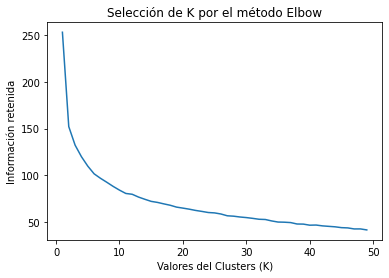

In [ ]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=12)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('Selección de K por el método Elbow')
plt.xlabel('Valores del Clusters (K)')
plt.ylabel('Información retenida')
plt.show()

Observando la gráfica obtenida como resultado de probar con un número de clusters entre 1 y 50, apreciamos que el "codo" se encuentra cerca de 35, por lo tanto usaremos este número de clusters para obtener un buen resultado e intentar evitar sobreajuste.

In [ ]:
kmeans = KMeans(n_clusters = 35)
kmeans.fit(train_data)
kmeans.inertia_

50.6710630684727

Obtenemos un valor de `50.67` que por supuesto se puede mejorar con un mayor número de clusters, pero como ya hemos dicho esto conlleva a sobreajuste.

Por otro lado, podemos observar como con un menor número de clusters se obtienen peores resultados.

In [ ]:
kmeans_over_fit = KMeans(n_clusters = 150)
kmeans_over_fit.fit(train_data)
print(kmeans_over_fit.inertia_)

kmeans_low = KMeans(n_clusters = 20)
kmeans_low.fit(train_data)
print(kmeans_low.inertia_)

16.06610686491177
65.79343118003531


In [ ]:
kmeans.labels_

array([24,  0, 13, 27,  2,  5,  4, 23,  5, 19,  2,  5,  5,  3, 11,  5,  3,
       17, 16, 17,  5, 34,  2,  0, 27,  7, 13,  9, 27, 16,  3,  5,  8,  9,
       17,  1,  0,  0,  5,  3, 26, 25, 10,  4, 32, 11, 17, 25, 20,  3,  1,
       22,  5,  9, 13,  3,  0, 10,  9,  5,  6, 29, 16, 27, 13, 16, 17,  3,
       17,  6,  5, 25, 20,  9, 15, 13,  5,  8, 34,  2, 20,  8,  0, 17,  8,
        9,  0,  5, 11,  7,  3,  5,  8, 26,  0, 29,  9, 13, 13, 17,  9, 15,
       11,  2,  5, 34, 16,  0,  0, 16, 25, 25, 25,  3, 23,  5, 25,  2,  4,
        8, 11,  0, 26, 13, 32,  8,  5,  7,  9, 17,  5, 12,  5,  9,  3, 33,
       19,  2, 11,  7, 32, 24, 23, 12,  9, 22,  8, 25,  6,  9, 17,  6,  3,
       31, 27,  9,  5, 11,  7, 26,  9,  4,  1, 13,  0, 13, 33,  4, 27,  5,
       13, 25, 16,  5,  7,  9,  0, 25,  5, 22, 15,  3,  0, 28,  4, 11,  5,
        9,  8,  5,  2,  5,  5,  9, 25, 25,  8, 25, 16,  2,  9,  1, 11,  5,
       13,  2,  0,  6, 25, 15, 17, 33,  8,  3,  5, 12,  5, 22, 25,  7,  9,
        8, 20, 17, 30, 19

Volviendo a analizar los datos ubicados en cada cluster, apreciamos que la distribución obtenida no ha sido muy buena, ya que existen muchos clusters con menos de 10 valores y otros pocos con 30 o más. Esto es un posible indicio de mal agrupamiento o que los datos no estén hechos para ser agrupados mediante prototipos.

In [ ]:
vector = [0 for i in range(kmeans.n_clusters)]
for i in kmeans.labels_:
  vector[i] += 1
print(vector)

[24, 8, 17, 19, 9, 49, 5, 9, 20, 27, 2, 15, 9, 21, 3, 8, 19, 21, 2, 9, 13, 1, 5, 4, 3, 32, 8, 15, 1, 2, 1, 1, 5, 5, 6]


Aunque hayamos escogido como número adecuado de clusters 35 ya que representaba el codo de la función dispuesta, aún así, el rango en el que se visualizó fue entre 1 y 50, si expandiéramos el rango para que llegue hasta 150, veríamos como el codo no parece estar en el mismo punto, más bien alrededor de 70 - 80.

Podemos concluir que realmente es incluso peor de lo que habíamos visto, ya que para necesitamos unos 75 clusters que es inviable sobre todo teniendo en cuenta el número reducido de muestras con los que contamos (~570).

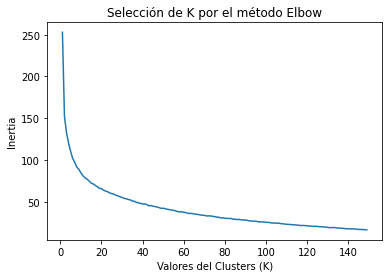

In [ ]:
wcss = []
for i in range(1, 150):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 12)
    kmeans.fit(train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 150), wcss)
plt.title('Selección de K por el método Elbow')
plt.xlabel('Valores del Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#### Comparando con el conjunto reducido de datos

Ya que el agrupamiento basado en prototipos utilizando las 30 variables parece inviable, probemos con el conjunto reducido obtenido previamente tras eliminar aquellas variables con las que se obtenía una correlación de 0.925 o superior.

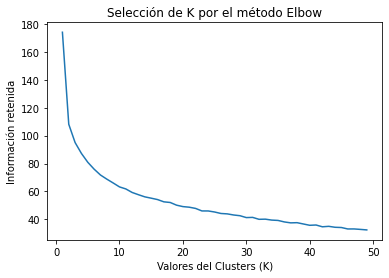

In [ ]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=12)
    kmeans.fit(reduced_train_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('Selección de K por el método Elbow')
plt.xlabel('Valores del Clusters (K)')
plt.ylabel('Información retenida')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 35)
kmeans.fit(reduced_train_data)
kmeans.inertia_

39.39429431326733

Podemos ver que la gráfica es muy similar a la obtenida con el conjunto de datos original en cuanto a la curvatura. Aún así, se comienza desde valores de `inertia` menores y se logran menores valores también, pero ya que la `inertia` no es una métrica normalizada, no podemos compararlas adecuadamente. 

Lo que sí podemos observar es que el codo está aproximadamente donde mismo, pero ya que se obtuvieron menores valores de la `inertia` es posible afirmar que cuantas menos variables tengamos será más sencillo obtener mejores agrupamientos.

### Clustering jerárquico

Debido a que uno de los mayores problemas del agrupamiento reside en la desición del número apropiado de clusters, se plantea como solución el agrupamiento jerárquico ya que con él se construye una estructura en la que los elementos se agrupan en subconjuntos de tamaños ascendentes hasta obtener un conjunto en el que se recogan todos los datos.

Generalmente se utilizan dos tipos de estrategias:
*   Aglomerativas: Acercamiento ascendente. Cada dato comienza en su propio grupo y los pares de grupos son mezclados mientras uno sube en la jerarquía.
*   Divisivas: Acercamiento descendente. Todos los datos comienzan en un mismo grupo, y de este se resalizan divisiones mientras uno baja en la jerarquía.

Los resultados del agrupamiento jerárquico pueden ser representados mediante un dendrograma para representar las distancias entre los clusters.



Definimos la función `compareLinkageMethods` que recibe una base de datos sin la variable de clase, es decir las características y por otro lado una lista con los métodos a utilizar.

En esta función se utiliza el método `linkage` de la librería `scipy` para realizar el agrupamiento jerárquico. A continuación se calculan por un lado las distancias originales entre las filas del conjunto de datos y por el otro se obtienen las `distancias Cophenetic`. Con estos dos conjuntos de distancias se obtiene el índice de correlación cofenético obteniendo valores entre 0 y 1 y quedándonos con el método con el que se obtiene el mayor valor posible.

In [ ]:
def compareLinkageMethods(data, methods):
  highest_corr_coef = 0
  best_method = ""
  for method in methods:
    z = linkage(data, method)
    origin_dists = pdist(bc_df_features)  # Matrix of original distances between observations
    cophe_dists = cophenet(z)  # Matrix of cophenetic distances between observations

    # Cophenetic correlation coefficient
    corr_coef = np.corrcoef(origin_dists, cophe_dists)[0,1]
    corr_coef = round(corr_coef, 5)
    print("--> Using method: \"" + method + "\" obtained a Cophenetic correlation coefficient of: \"" + str(corr_coef) + "\"")
    if (corr_coef > highest_corr_coef):
        best_method = method
        highest_corr_coef = corr_coef
  return highest_corr_coef, best_method

Creamos la lista con todas las posibilidades para calcular las distancias usadas en el agrupamiento y llamamos al método previamente definido obteniendo el mejor resultado que implicaría que usando ese método se logran preservar mejor las distancias originales.

In [ ]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted", "median"]
highest_corr_coef, best_method = compareLinkageMethods(bc_df_features, linkage_methods)
print("\nThe best Cophenetic correlation coefficient was: \"" + str(highest_corr_coef) + "\" using the method: \"" + best_method + "\"")

--> Using method: "single" obtained a Cophenetic correlation coefficient of: "0.7165"
--> Using method: "complete" obtained a Cophenetic correlation coefficient of: "0.62441"
--> Using method: "average" obtained a Cophenetic correlation coefficient of: "0.81873"
--> Using method: "centroid" obtained a Cophenetic correlation coefficient of: "0.77687"
--> Using method: "ward" obtained a Cophenetic correlation coefficient of: "0.63294"
--> Using method: "weighted" obtained a Cophenetic correlation coefficient of: "0.59467"
--> Using method: "median" obtained a Cophenetic correlation coefficient of: "0.50388"

The best Cophenetic correlation coefficient was: "0.81873" using the method: "average"


Los dendrogramas mostrados están de tal modo que los últimos `p` agrupamientos de más de un elemento son contraidos como nodos hojas y representado el número de elementos contraídos entre `()`.

Con el mejor agrupamiento que hemos logrado, mostramos el dendrograma correspondiente que representa las distancias entre los puntos.

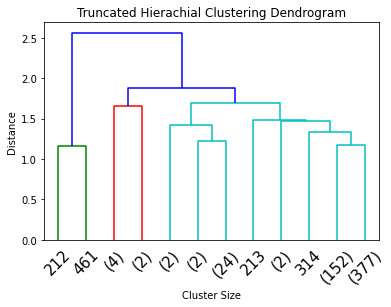

In [ ]:
# Generate dendrogram
z = linkage(bc_df_features, best_method)
dendrogram(z, truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

# Divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

Probamos también con el peor agrupamiento que hemos logrado aunque no lograremos extraer mucha información nueva de este.

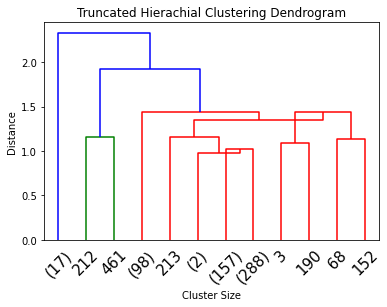

In [ ]:
# We use the worst linkage method
z = linkage(bc_df_features,"median")

# Generate dendrogram
dendrogram(z, truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

# Divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

Finalmente vamos a, partiendo de un dendrograma, "podar" en la profundidad `k` generando los agrupamientos adecuados.

In [ ]:
k = 40
# build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")
# fit the model on the dataset
HClustering.fit(bc_df_features)
HClustering.labels_

array([37,  2,  2, 33,  2,  1,  2,  1,  1,  4, 38,  1, 28, 38, 17,  1, 38,
        1,  2, 38, 38, 38, 16,  2,  2, 18,  1,  2,  1,  2,  2,  1,  2,  2,
        1,  1, 38, 38,  3,  1, 38,  1, 20,  1,  1,  2, 38,  1, 38, 38, 38,
       38, 38,  2, 38, 38,  2,  1, 38,  7,  7,  7, 17, 38,  1,  1,  7, 38,
       27, 38,  2,  8,  2, 38, 38,  2,  7, 18, 25, 38,  7,  1, 36, 26, 38,
        2, 38,  2, 38,  1, 38, 38, 38, 38,  1,  2, 38,  7, 38, 38, 38,  7,
       38, 38, 38,  1, 38, 38, 31, 38,  7, 38,  0, 38,  7, 38,  8,  1,  1,
       12, 38,  2, 29, 38, 38, 38, 38,  2,  1,  2, 38,  2,  2, 38,  2, 38,
       38, 38,  1,  7, 38,  2, 38, 38, 38,  7, 16, 38, 38, 38,  7, 34, 21,
       38, 38, 38,  2,  3, 38, 38, 38,  2,  2, 38,  2, 38, 38,  2,  2, 38,
       38, 38,  1,  7, 38, 38,  8,  1, 38, 38, 36, 10, 38, 38, 38, 38,  2,
       38, 38, 38, 39, 38, 30,  1,  1, 38,  1,  3,  2,  1, 38,  2, 10, 15,
       38, 38, 38,  2,  1, 38,  2, 38, 23, 24,  1,  1, 38, 38,  2, 13, 38,
       38, 38,  1, 38, 38

In [ ]:
k = 10
# build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")
# fit the model on the dataset
HClustering.fit(bc_df_features)
HClustering.labels_

array([7, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 7, 3, 0, 0, 0, 7, 9, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
k = 100
# build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="average")
# fit the model on the dataset
HClustering.fit(bc_df_features)
HClustering.labels_

array([75,  8,  7, 67, 28, 21,  8, 14, 30, 95, 31,  0, 57, 31,  9, 30, 31,
        0,  2, 39, 39, 23, 16,  2, 10, 56, 30,  8, 30,  8,  7, 94,  7, 66,
        0, 36, 31, 17, 85,  0, 18, 14, 83,  0,  0,  7, 23,  0, 23, 18, 23,
       23, 23,  8, 31, 23,  2,  0, 23, 40, 26, 15,  9, 33, 14, 14, 15, 23,
       55, 23,  8, 68, 66, 39, 23,  8, 91,  3, 51, 23, 15,  0, 71, 53, 23,
        8, 31,  2, 42, 11, 18, 31, 23, 23,  0, 32, 17, 15, 23, 31, 31, 90,
       18, 42, 17, 21, 42, 23, 63, 42, 15, 42, 52, 42, 40, 42, 84,  0,  0,
       86, 23,  8, 59, 39, 43, 23, 31,  8, 11,  7, 23,  8,  8, 39,  8, 18,
       17, 23, 58, 69, 20,  8, 23, 23, 23,  6, 93, 43, 39, 23, 26, 34, 87,
       23, 23, 23,  8, 76, 23, 23, 42, 79,  7, 42,  2, 23, 20,  8, 89, 23,
       23, 31, 21, 15, 17, 20, 73,  0, 41, 23, 35, 12, 31, 43, 31, 23,  8,
       23, 17, 23, 80, 17, 61, 14,  0, 23, 14, 76,  2,  0, 42,  8, 70, 64,
       42, 39, 23,  8,  0, 39, 32, 23, 97, 99, 49,  0, 42, 17, 32, 13, 23,
       39, 23,  0, 23, 39

Analizando los resultados podemos ver que siempre hay un cluster predominante, usando tanto valores de k pequeños como muy grande, ya habíamos visto en el dendrograma que habíamos muchos datos desbalanceados colapsados en un grupo.

Esto es indicio de que los datos no se distribuyen de tal forma que un agrupamiento jerárquico los ordene de manera correcta.

### Clustering basado en densidad

Los algoritmos para clustering basado en densidad identifican regiones
de alta densidad que están rodeadas de áreas poco densas, cada una de las regiones densas identificadas se corresponde con un
cluster. 

El clustering basado en densidad es apropiado cuando los clusters no
tienen una forma geométrica definida.

Lo primero es calcular la distancia media entre cada punto del conjunto de datos y sus 5 vecinos más cercanos (el valor MinPts seleccionado).

In [ ]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(train_data)
distances, indices = neighbors_fit.kneighbors(train_data)

A continuación ordenaremos los valores de la distancia por valor ascendente y dibujaremos un plot pertinente para visualizar la distancia media entre puntos:

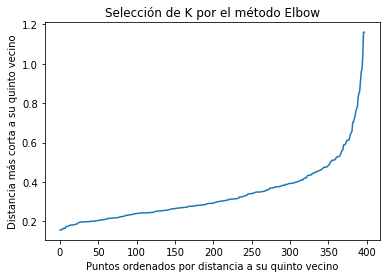

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Selección de K por el método Elbow')
plt.xlabel('Puntos ordenados por distancia a su quinto vecino')
plt.ylabel('Distancia más corta a su quinto vecino')
plt.plot(distances)


El valor ideal de ε será igual al valor de la distancia en el "pliegue del codo", o el punto de máxima curvatura, este punto representa el punto de optimización en el que los rendimientos decrecientes ya no compensan el coste adicional. Este concepto de rendimiento decreciente se aplica aquí porque, aunque aumentar el número de clústers siempre mejorará el ajuste del modelo, también aumenta el riesgo de que se produzca un sobreajuste.

**Nuestro valor ideal está en torno a 0.6**

In [ ]:
dbscan = DBSCAN(eps = 0.6, min_samples = 5)

Una vez cargado el módulo DBSCAN de *sklearn* e instanciado un objeto de su clase, podemos empezar a aplicar el método descrito.
Para ello llamaremos  la función *fit_predict* que nos permitirá entrenar y predecir los clusters:

In [ ]:
preds = dbscan.fit_predict(train_data)
preds

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0

Podemos ver que con un número de muestras mínimas de 5 (muestras necesarias en epsilon para ser punto central) hay muchos puntos ruido representados con -1 y el resto de datos son etiquetados en el único cluster 0.

Observando esta pésima distribución podemos concluir que tal y como se esperaba, este agrupamiento no es adecuado a la distribución de nuestros datos.

## Multi Layer Perceptron (MLP)

Hemos decicido aplicar más técnicas de aprendizaje estudiadas a lo largo de la asignatura, y una de las que mejores resultados nos ha dado al ser aplicadas sobre este nuestro dataset.

### Perceptron

El modelo biológico más simple de un perceptrón es una neurona y viceversa. Es decir, el modelo matemático más simple de una neurona es un perceptrón. La neurona es una célula especializada y caracterizada por poseer una cantidad indefinida de canales de entrada llamados dendritas y un canal de salida llamado axón. Las dendritas operan como sensores que recogen información de la región donde se hallan y la derivan hacia el cuerpo de la neurona que reacciona mediante una sinapsis que envía una respuesta hacia el cerebro, esto en el caso de los seres vivos.

Una neurona sola y aislada carece de razón de ser. Su labor especializada se torna valiosa en la medida en que se asocia a otras neuronas, formando una red. Normalmente, el axón de una neurona entrega su información como "señal de entrada" a una dendrita de otra neurona y así sucesivamente. El perceptrón que capta la señal en adelante se extiende formando una red de neuronas, sean éstas biológicas o de sustrato semiconductor (compuertas lógicas).

### Multi Layer Perceptron

El perceptrón multicapa es una red neuronal artificial (RNA) formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón (también llamado perceptrón simple).

#### Distribución de los datos

Se convierte la `diagnosis` de categórico a booleano y se reparten los datos en un 75% para entrenamiento y el otro 25% para pruebas.

Se preparan los conjuntos de pruebas, moviendo el valor de la `diagnosis` del conjunto de testeo a un conjunto objetivo.

In [ ]:
def categorical_to_boolean(tumor):
    return True if tumor=='M' else False


# Cargamos los datos como un nuevo DataFrame de Pandas. (Breast Cancer DataFrame - bc_df)
original_bc_df = bc_df.copy()
original_bc_df['diagnosis'] = original_bc_df['diagnosis'].apply(categorical_to_boolean)

original_bc_df_targets =  original_bc_df['diagnosis']
original_bc_df_features = original_bc_df.drop('diagnosis', 1)

print(original_bc_df)


bc_df_train = original_bc_df.sample(frac=0.75,random_state=200)
bc_df_test = original_bc_df.drop(bc_df_train.index)

# test
bc_df_test.drop(bc_df_test.filter(regex="Unnamed"), axis=1, inplace=True)
input_test = bc_df_test.drop(['diagnosis'], 1)
target_test = bc_df_test['diagnosis']

print(input_test)
print(target_test)


     diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         True     0.521037  ...        0.598462                 0.418864
1         True     0.643144  ...        0.233590                 0.222878
2         True     0.601496  ...        0.403706                 0.213433
3         True     0.210090  ...        1.000000                 0.773711
4         True     0.629893  ...        0.157500                 0.142595
..         ...          ...  ...             ...                      ...
564       True     0.690000  ...        0.097575                 0.105667
565       True     0.622320  ...        0.198502                 0.074315
566       True     0.455251  ...        0.128721                 0.151909
567       True     0.644564  ...        0.497142                 0.452315
568      False     0.036869  ...        0.257441                 0.100682

[569 rows x 31 columns]
     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0       0.



#### Visualización de los 30 atributos de 5 pacientes

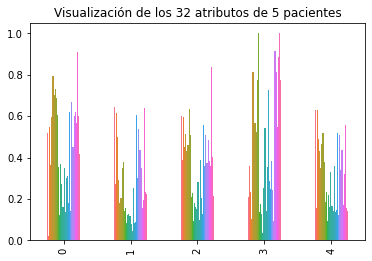

In [ ]:
# sns.set_palette(sns.color_palette())
sns.set_palette(sns.color_palette("husl", 30))

ax = original_bc_df_features[:5].plot.bar()
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,4)
plt.title("Visualización de los 30 atributos de 5 pacientes")
ax.get_legend().remove()
plt.show()

#### Entrenamiento del Perceptrón Simple

Se distribuyen los datos del conjunto inicial de entrenamiento en entrenamiento y validación para el correcto entrenamiento del Perceptrón Simple 

In [ ]:
train_size = 0.66
test_size = 1 - train_size

print("Preprocessing data, %d%% for training and %d%% for validation" % (train_size * 100, test_size * 100))

train_data, test_data, train_targets, test_targets = train_test_split(original_bc_df_features, original_bc_df_targets, test_size=0.30, shuffle=False, random_state=0)

max_iter = 30

print("Learning a Perceptron with %d maximum number of iterations and ..." % max_iter)

per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(train_data, train_targets)

# Results
print("Printing Perceptron results")

predict_train = per.predict(train_data)
predict_valid = per.predict(test_data)

print("Train accuracy: %.3f%%" % (accuracy_score(train_targets, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(test_targets, predict_valid) * 100))

Preprocessing data, 66% for training and 34% for validation
Learning a Perceptron with 30 maximum number of iterations and ...
-- Epoch 1
Norm: 7.16, NNZs: 30, Bias: -6.000000, T: 398, Avg. loss: 0.141749
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8.65, NNZs: 30, Bias: -8.000000, T: 796, Avg. loss: 0.081654
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.49, NNZs: 30, Bias: -9.000000, T: 1194, Avg. loss: 0.077538
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.83, NNZs: 30, Bias: -9.000000, T: 1592, Avg. loss: 0.062506
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 11.75, NNZs: 30, Bias: -10.000000, T: 1990, Avg. loss: 0.053139
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 12.22, NNZs: 30, Bias: -10.000000, T: 2388, Avg. loss: 0.072052
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 12.85, NNZs: 30, Bias: -11.000000, T: 2786, Avg. loss: 0.060505
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 13.53, NNZs: 30, Bias: -11.000000, T: 3184, Avg. los

#### Entrenamiento del Perceptrón Multicapa

Se define una función encargada de realizar el entrenamiento del Perceptrón Multicapa

In [ ]:
def MLP_train_valid(mlp, train_data, train_targets, test_data, test_targets, max_iter, valid_cycles, verbose):
    """
    Train and valid MLP every valid_cycles iterations
    """
    classes  = np.unique(train_targets)
    loss_valid = []
    for i in range(max_iter//valid_cycles):
        for j in range(valid_cycles):
            out = mlp.partial_fit(train_data, train_targets, classes)
            # Calculate loss function of valid set
        last_lost_valid = log_loss(test_targets, mlp.predict_proba(test_data))
        loss_valid.append(last_lost_valid)
        if verbose:
            print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
                  (mlp.n_iter_, mlp.loss_, last_lost_valid))
        if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
            if verbose:
                print("Early stopping: Validation score did not improve")
            break
    if verbose: print(out)
    
    if verbose:
        # Visualizing the Cost Function Trajectory
        # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
        print("Visualizing the Cost Function Trajectory")
        plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
        plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
        plt.xlabel('number of iterations')
        plt.ylabel('loss function')
        plt.legend(loc='upper right')
        plt.show()

Se invoca la función anteriormente declarada con los argumentos pertinentes

Learning a MLP with 60 hidden neurons, 250 maximum number of iterations and 0.00100000 learning rate ...
Iteration 5, train loss = 0.66317440, valid loss = 0.61068905
Iteration 10, train loss = 0.61367690, valid loss = 0.62816464
Early stopping: Validation score did not improve
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Visualizing the Cost Function Trajectory


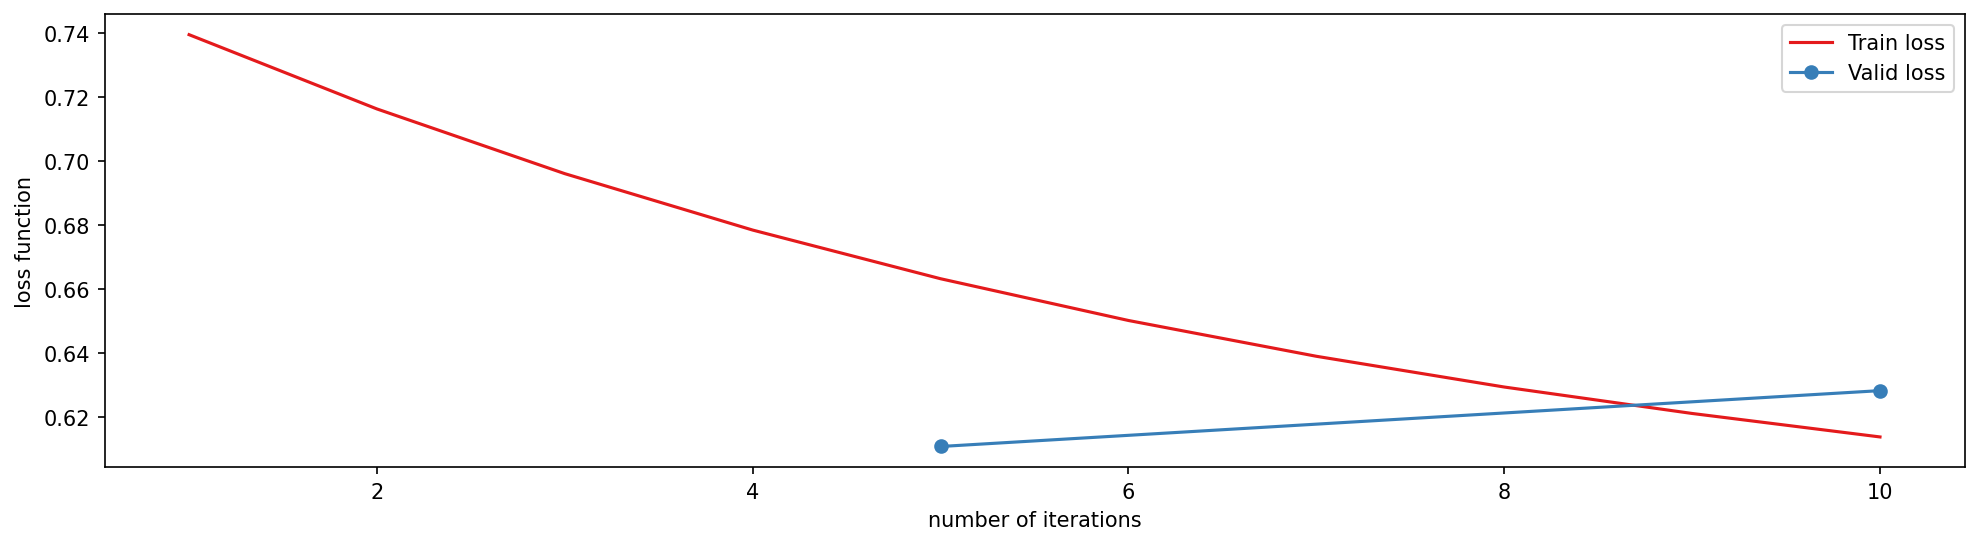

In [ ]:
sns.set_palette(sns.color_palette("Set1"))

n_hidden = 60
max_iter = 250
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True

print("Learning a MLP with %d hidden neurons, %d maximum number of iterations and %.8f learning rate ..." % (n_hidden, max_iter, learning_rate_init))

mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)

MLP_train_valid(mlp, train_data, train_targets, test_data, test_targets, max_iter, valid_cycles, True)

Se muestran los resultados iniciales:

In [ ]:
print("Printing intial results")

predict_train = mlp.predict(train_data)
predict_valid = mlp.predict(test_data)

print("Train accuracy: %.3f%%" % (accuracy_score(train_targets, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(test_targets, predict_valid) * 100))

print("Train confusion matrix:")
print(confusion_matrix(train_targets, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(test_targets, predict_valid))

print("Train classification report:")
print(classification_report(train_targets, predict_train))
print("Valid classification report:")
print(classification_report(test_targets, predict_valid))

Printing intial results
Train accuracy: 92.965%
Valid accuracy: 87.135%
Train confusion matrix:
[[199  26]
 [  2 171]]
Valid confusion matrix:
[[110  22]
 [  0  39]]
Train classification report:
              precision    recall  f1-score   support

       False       0.99      0.88      0.93       225
        True       0.87      0.99      0.92       173

    accuracy                           0.93       398
   macro avg       0.93      0.94      0.93       398
weighted avg       0.94      0.93      0.93       398

Valid classification report:
              precision    recall  f1-score   support

       False       1.00      0.83      0.91       132
        True       0.64      1.00      0.78        39

    accuracy                           0.87       171
   macro avg       0.82      0.92      0.84       171
weighted avg       0.92      0.87      0.88       171



#### Optimización del ratio de aprendizaje

Con el objetivo de detectar un buen ratio de aprendizaje para nuestro Percerptrón Multicapa, se prueban y estudian varios valores para seleccionar el mejor

In [ ]:
print("Learning rate optimization")

tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'tanh'
random_state = 0

now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
    mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
    MLP_train_valid(mlp, train_data, train_targets, test_data, test_targets, max_iter, valid_cycles, False)
    
    loss_curves.append(mlp.loss_curve_)

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

Learning rate optimization
Number of seconds for training: 3


Se representa la información obtenida para comprobar las curvas y llegar a la conclusión de que el mejor valor es el de `0.05`, al intentar minimizar, en un bajo número de iteraciones, el valor de loss function, tratando de lograr una curva suave.

Visualizing the Cost Function Trajectory with different learning rates


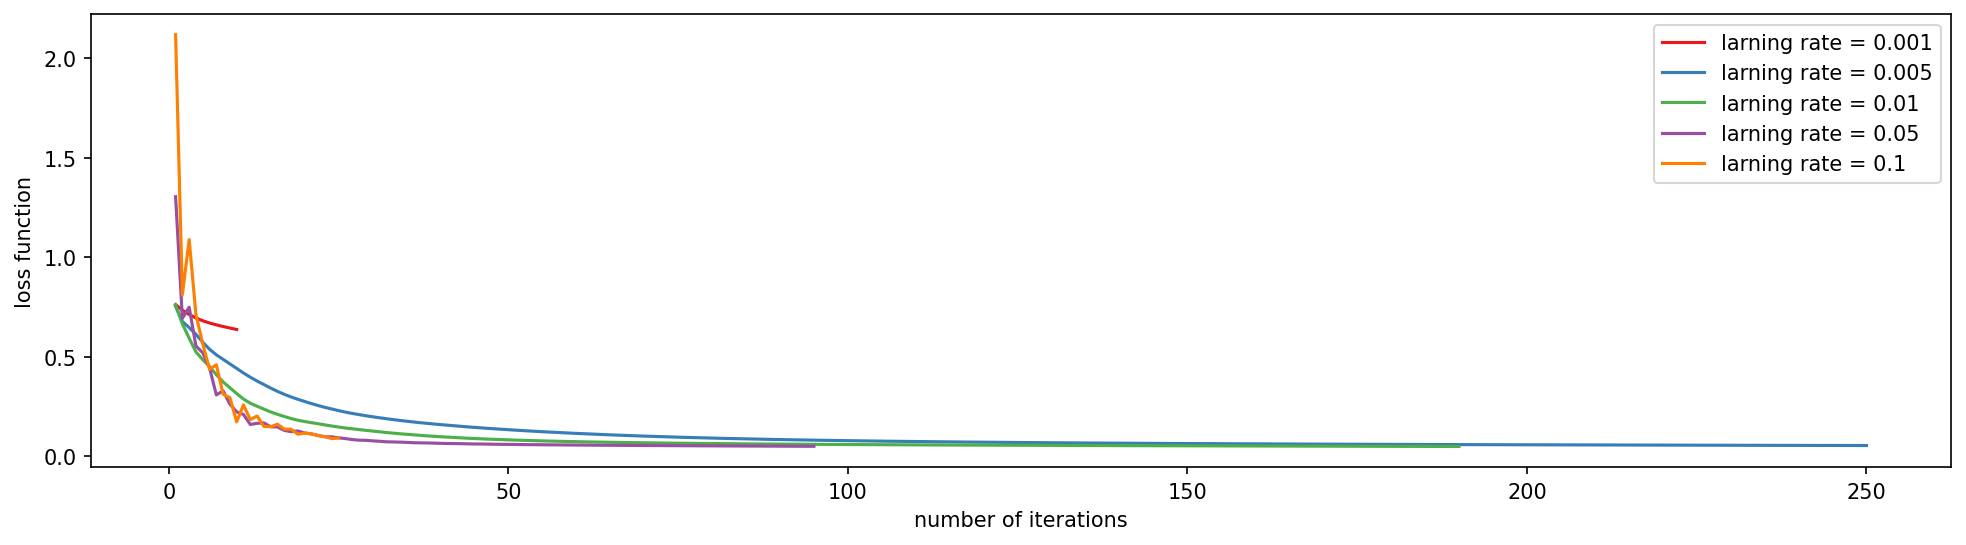

In [ ]:
print("Visualizing the Cost Function Trajectory with different learning rates")
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
    plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))

plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

#### Optimización del número de neuronas ocultas

Con el objetivo de detectar un buen número de neuronas ocultas para nuestro Percerptrón Multicapa, se prueban y estudian varios valores para seleccionar el mejor

In [ ]:
print("Architecture optimization")

tests_n_hidden = [1, 3, 5, 7, 10, 20, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310]
# tests_n_hidden = [1, 3, 5, 7, 10, 30, 50]
# tests_n_hidden = [1, 3, 5, 7, 9, 10, 50, 150, 300]
n_reps = 20
activation = 'tanh'
learning_rate_init = 0.05

now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
        MLP_train_valid(mlp, train_data, train_targets, test_data, test_targets, max_iter, valid_cycles, False)
        
        acc_train = accuracy_score(train_targets, mlp.predict(train_data))
        acc_valid = accuracy_score(test_targets, mlp.predict(test_data))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_mlp = mlp
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Architecture optimization
Seed = 0, train acc = 0.98492462, valid acc = 0.98245614, iterations = 250
Seed = 1, train acc = 0.56532663, valid acc = 0.77192982, iterations = 25
Seed = 2, train acc = 0.98492462, valid acc = 0.98245614, iterations = 250
Seed = 3, train acc = 0.56532663, valid acc = 0.77192982, iterations = 20
Seed = 4, train acc = 0.98743719, valid acc = 0.98245614, iterations = 220
Seed = 5, train acc = 0.57035176, valid acc = 0.77777778, iterations = 15
Seed = 6, train acc = 0.98241206, valid acc = 0.98245614, iterations = 250
Seed = 7, train acc = 0.98492462, valid acc = 0.97660819, iterations = 250
Seed = 8, train acc = 0.98743719, valid acc = 0.97660819, iterations = 250
Seed = 9, train acc = 0.56532663, valid acc = 0.77192982, iterations = 15
Seed = 10, train acc = 0.56532663, valid acc = 0.77192982, iterations = 20
Seed = 11, train acc = 0.98743719, valid acc = 0.98245614, iterations = 250
Seed = 12, train acc = 0.98743719, valid acc = 0.98245614, iterations = 250
S

Se unifican los resultados del aprendizaje, con los distintos números de neuronas ocultas, en un data frame de pandas para lograr una correcta representación de los mismos

In [ ]:
df_1 = pd.DataFrame()
df_1["Number of hidden units"] = tests_n_hidden 
df_1["Error(%)"] = 100 *(1- np.array(accs_train))
df_1["Category"] = "Train"

df_2 = pd.DataFrame()
df_2["Number of hidden units"] = tests_n_hidden 
df_2["Error(%)"] = 100 *(1- np.array(accs_valid))
df_2["Category"] =  "Valid"

display_df = pd.concat([df_1, df_2])

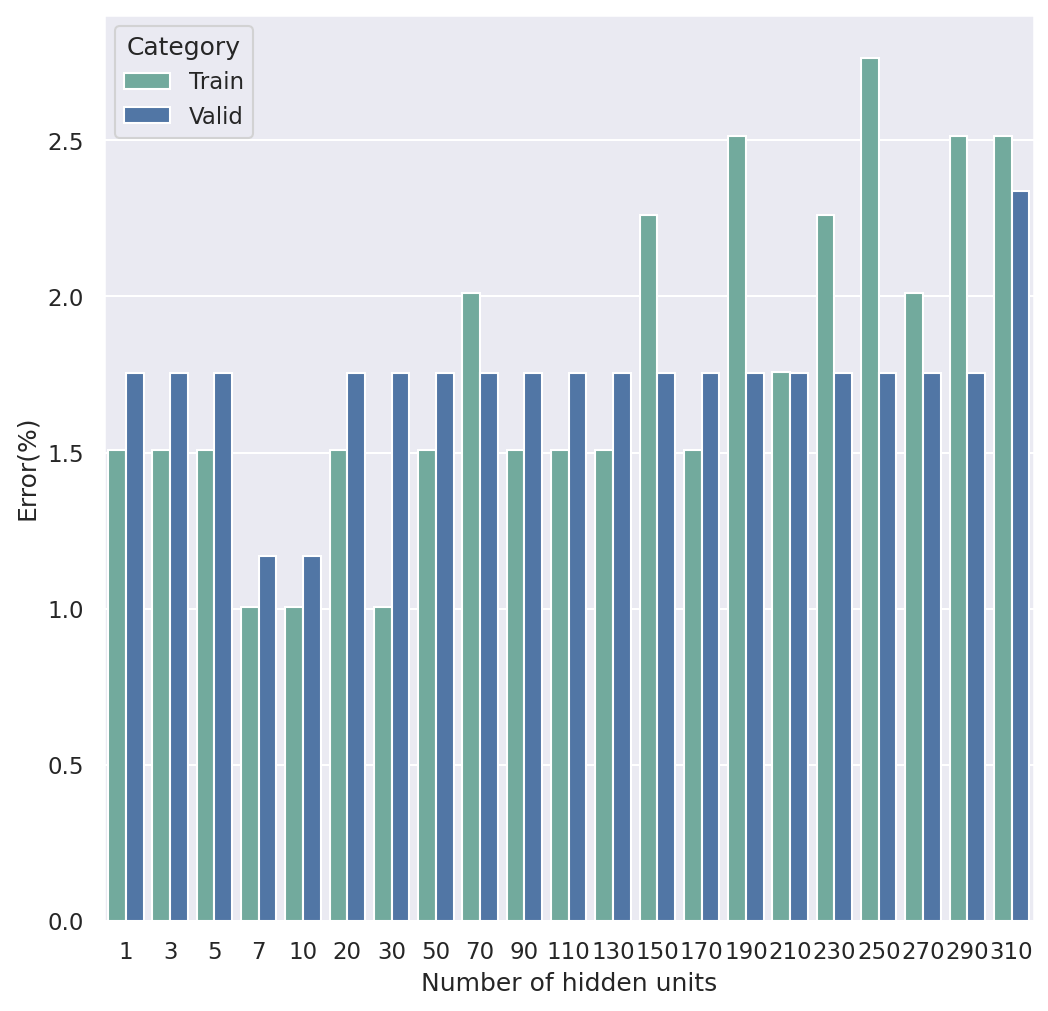

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set the colors
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# grouped barplot
# sns.barplot(x="day", y="total_bill", hue="smoker", data=display_df, ci=None);
sns.barplot(x="Number of hidden units", y="Error(%)", hue="Category", data=display_df, ci=None);
sns.set_palette(sns.color_palette("Set1"))

#### Resultados finales

In [ ]:
print("Printing final results")

predict_train = best_mlp.predict(train_data)
predict_valid = best_mlp.predict(test_data)
predict_test = best_mlp.predict(input_test)

print("Train accuracy: %.3f%%" % (accuracy_score(train_targets, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(test_targets, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("Train confusion matrix:")
print(confusion_matrix(train_targets, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(test_targets, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))

print("Train classification report:")
print(classification_report(train_targets, predict_train))
print("Valid classification report:")
print(classification_report(test_targets, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Printing final results
Train accuracy: 98.995%
Valid accuracy: 98.830%
Test accuracy: 97.887%
Train confusion matrix:
[[225   0]
 [  4 169]]
Valid confusion matrix:
[[130   2]
 [  0  39]]
Test confusion matrix:
[[83  2]
 [ 1 56]]
Train classification report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       225
        True       1.00      0.98      0.99       173

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Valid classification report:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       132
        True       0.95      1.00      0.97        39

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.99      0.99      0.99       171

Test classification report:
              precision    rec

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

*   Tasa de verdaderos positivos.
*   Tasa de falsos positivos.

**AUC** significa "área bajo la curva ROC" y proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

Printing ROC curves of test set


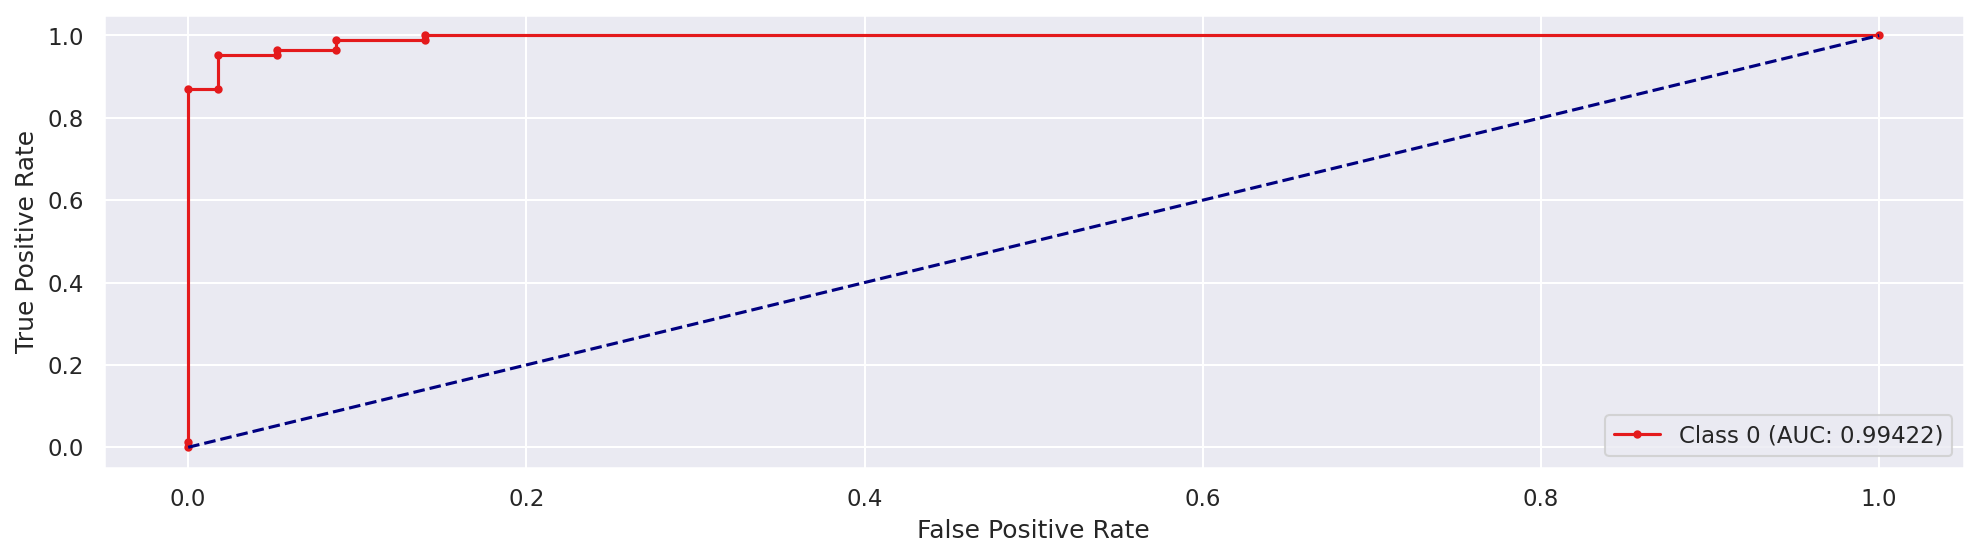

In [ ]:
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(train_targets)

mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in range(len(classes) - 1):
    mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla]))
    fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,cla])
    mlp_fpr.append(fpr)
    mlp_tpr.append(tpr)

print("Printing ROC curves of test set")
# plot the roc curve for the model
for cla in range(len(classes) - 1):
    # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(mlp_fpr[cla], mlp_tpr[cla], marker='.', label='Class %d (AUC: %.5f)' % (cla, mlp_auc[cla]))

# axis labels
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Teniendo en cuenta la teoría explicada sobre las curvas ROC, hemos obtenido un valor de **AUC** de 99.4%, que nos indica una gran precisión en las clasificaciones de nuestro modelo

## Generalization with Self Organizing Maps



### Distribución de los datos

Dividimos el conjunto de datos en un 75% para entrenamiento y validación y el 25% restante para testeo. Del 75% destinado al entrenamiento y la validación se reparte un 50% y un 25% respectivamente.

Para cada subconjunto tendremos por un lado la variable `target_` y por separado, el resto de columnas en variables `input_`.

In [ ]:
bc_df = original_bc_df.sample(frac = 0.75,random_state = 200)
bc_df_test = original_bc_df.drop(bc_df.index)

# Conjunto de testeo utilizado para contrastar los datos una vez entrenado el modelo
input_test = bc_df_test.drop(['diagnosis'], 1)
target_test = bc_df_test['diagnosis']

print(target_test)

0       True
6       True
7       True
27      True
29      True
       ...  
550    False
556    False
559    False
564     True
567     True
Name: diagnosis, Length: 142, dtype: bool


Separación del conjunto destinado a entrenamiento y validación entre variables de clase por un lado (`targets`) y el resto de características por el otro (`features`).

Mostramos las primeras 5 filas de estos datos tanto con una gráfica simple como simplemente los valores para verificar que el preprocesado se ha realizado de manera correcta.

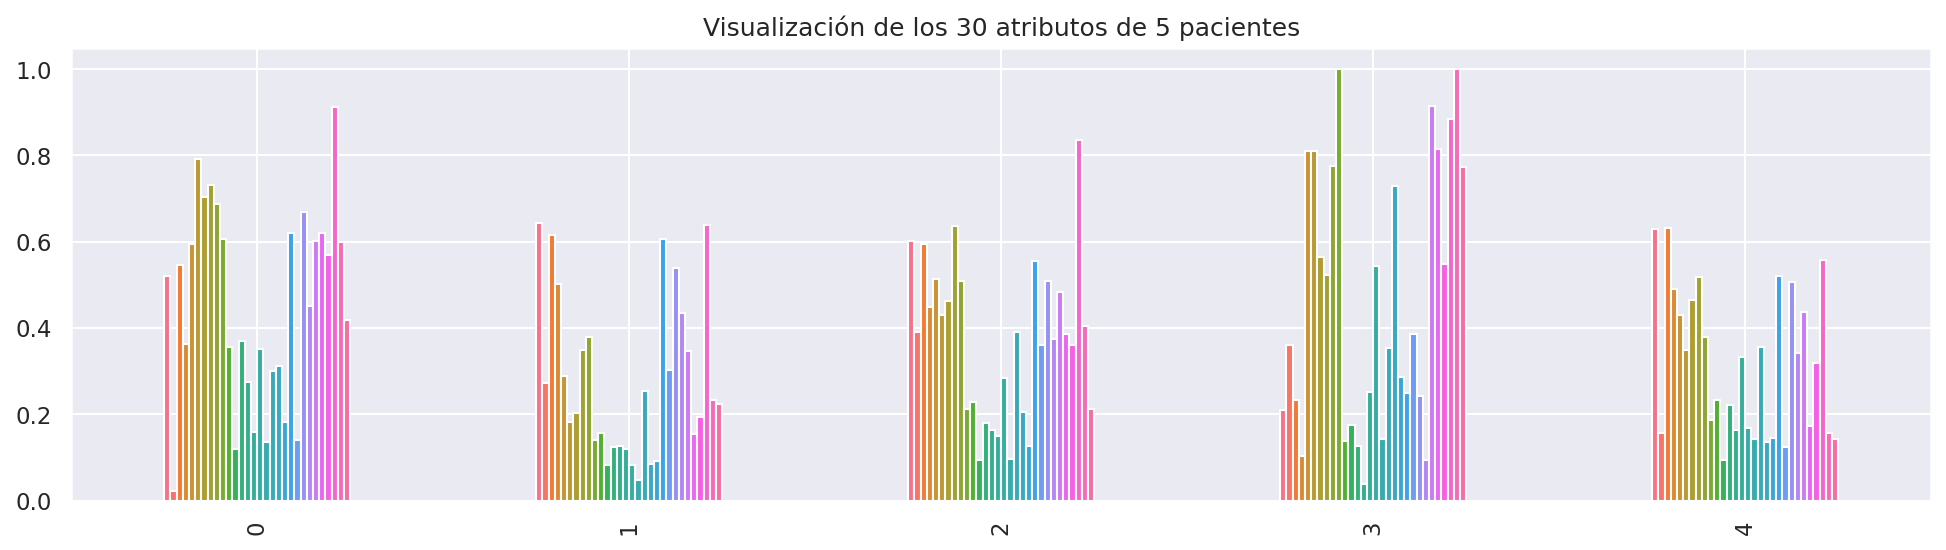

In [ ]:
sns.set_palette(sns.color_palette("husl", 30))

ax = bc_df_features[:5].plot.bar()
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,4)
plt.title("Visualización de los 30 atributos de 5 pacientes")
ax.get_legend().remove()
plt.show()

### **Separación de los datos de entrenamiento y validación**


Los datos de entrada serán filas de 30 columnas convenientemente preprocesadas. Como salida, tendremos un diagnóstico que indique si el paciente padece o no de cáncer de mama.

Se realiza una partición de los datos, reservando el 50% de los datos para entrenamiento, un 25% para validación y el 25% restante para test. Se barajea el cojunto de entrenamiento y se le aplica una normalización ya que ciertas columnas tenían datos muy dispares respecto al resto de columnas.

In [ ]:
# El tamaño de entrenamiento es del 66% del 75% inicial, por lo tanto se reparte el 50% del total
# para entrenamiento y un 25% del total para validación
train_size = 0.66
test_size = 1 - train_size

print("Preprocessing data, %d%% for training and %d%% for validation" % (train_size * 100, test_size * 100))

input_train, input_valid, target_train, target_valid = train_test_split(original_bc_df_features, original_bc_df_targets, test_size=test_size, shuffle=True, random_state=0)

print("Training set dimensions: " + str(input_train.shape))
print("Valid set dimensions: " + str(input_valid.shape))
print("Test set dimensions: " + str(input_test.shape))

Preprocessing data, 66% for training and 34% for validation
Training set dimensions: (375, 30)
Valid set dimensions: (194, 30)
Test set dimensions: (142, 30)


In [ ]:
bc_df = original_bc_df.sample(frac = 0.75,random_state = 200)
bc_df_test = original_bc_df.drop(bc_df.index)

# Conjunto de testeo utilizado para contrastar los datos una vez entrenado el modelo
input_test = bc_df_test.drop(['diagnosis'], 1)
target_test = bc_df_test['diagnosis']

print(target_test)

0       True
6       True
7       True
27      True
29      True
       ...  
550    False
556    False
559    False
564     True
567     True
Name: diagnosis, Length: 142, dtype: bool


### **Resultados iniciales SOM**

Se entrena el modelo SOM con 125 iteraciones, una rejilla de 10x10, distancia euclídea y un radio de aprendizaje igual a 2 tras probar con varios valores y observar que el error de cuantización desciende de manera más rápida.

Cambiando los posibles cálculos de la distancia, la distancia euclídea proporciona mejores resultados que la calculada con el producto entre puntos o mediante cálculo del coseno.
Por otro lado, hemos utilizado el radio de aprendizaje con valor de 2 ya que se obtienen resultados similares que con 3 y 4 pero el error de cuantización se estabiliza en un menor número de iteraciones.

In [ ]:
# Modeling SOM
# ------------

max_iter_som = 125
grid_height = 10
grid_width = 10
distance = 'euclid'
learning_radius = 2
step = 0.5
reduce_step_after = max_iter_som - 5
std = 1.0
reduce_std_after = max_iter_som - 5
weight = init.Normal()

print("Learning %dx%d SOM with %d maximum number of iterations and ..." % (grid_height, grid_width, max_iter_som))

now = datetime.now()
# Random generator seed for NeuPy
utils.reproducible(0)

sofm = algorithms.SOFM(
    n_inputs = input_train.shape[1],
    features_grid = (grid_height, grid_width),
    distance = distance,
    weight = weight,
    learning_radius = learning_radius,
    reduce_radius_after = max_iter_som // learning_radius,  # 0 radius at end
    step = step,
    reduce_step_after = reduce_step_after,
    std = std,
    reduce_std_after = reduce_std_after,
    shuffle_data = False,
    verbose = True,
)

sofm.train(input_train, epochs=max_iter_som)
sofm_output_train = sofm.predict(input_train)
sofm_output_valid = sofm.predict(input_valid)
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

Learning 10x10 SOM with 125 maximum number of iterations and ...

Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [10, 10]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 2
[OPTION] n_inputs = 30
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 62
[OPTION] reduce_std_after = 120
[OPTION] reduce_step_after = 120
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] std = 1.0
[OPTION] step = 0.5
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)

#1 : [172 ms] train: 0.085640


#2 : [150 ms] train: 0.078147
#3 : [161 ms] train: 0.077750


#4 : [216 ms] train: 0.076382
#5 : [147 ms] train: 0.078114


#6 : [177 ms] train: 0.076906
#7 : [149 ms] train: 0.078160


#8 : [168 ms] train: 0.077367
#9 : [160 ms] train: 0.077402


#10 : [158 ms] train: 0.076937
#11 : [142 ms] train: 0.077373


#12 : [173 ms] train: 0.076455
#13 : [151 ms] train: 0.075254


#14 : [161 ms] train: 0.077269
#15 : [147 ms] train: 0.076684


#16 : [148 ms] train: 0.077618
#17 : [153 ms] train: 0.075170


#18 : [168 ms] train: 0.076500
#19 : [162 ms] train: 0.075487


#20 : [163 ms] train: 0.076442
#21 : [152 ms] train: 0.076152


#22 : [159 ms] train: 0.075456
#23 : [148 ms] train: 0.077524


#24 : [186 ms] train: 0.075424
#25 : [159 ms] train: 0.074529


#26 : [171 ms] train: 0.075155
#27 : [152 ms] train: 0.075183


#28 : [163 ms] train: 0.075078
#29 : [147 ms] train: 0.075420


#30 : [154 ms] train: 0.075221
#31 : [153 ms] train: 0.075694


#32 : [163 ms] train: 0.074481
#33 : [153 ms] train: 0.074318


#34 : [167 ms] train: 0.075391
#35 : [146 ms] train: 0.074406


#36 : [163 ms] train: 0.074999
#37 : [145 ms] train: 0.074566


#38 : [168 ms] train: 0.074850
#39 : [150 ms] train: 0.074929


#40 : [176 ms] train: 0.074572
#41 : [149 ms] train: 0.074257


#42 : [168 ms] train: 0.073846
#43 : [152 ms] train: 0.073217


#44 : [170 ms] train: 0.072152
#45 : [146 ms] train: 0.072227


#46 : [153 ms] train: 0.072066
#47 : [165 ms] train: 0.071664


#48 : [165 ms] train: 0.072054
#49 : [158 ms] train: 0.071836


#50 : [174 ms] train: 0.071346
#51 : [155 ms] train: 0.071344


#52 : [158 ms] train: 0.072130
#53 : [149 ms] train: 0.072716


#54 : [153 ms] train: 0.071316
#55 : [147 ms] train: 0.072078


#56 : [159 ms] train: 0.072193
#57 : [165 ms] train: 0.071696


#58 : [164 ms] train: 0.071603
#59 : [151 ms] train: 0.071499


#60 : [159 ms] train: 0.072036
#61 : [148 ms] train: 0.071710


#62 : [155 ms] train: 0.064813
#63 : [165 ms] train: 0.064586


#64 : [174 ms] train: 0.064163
#65 : [163 ms] train: 0.064290


#66 : [155 ms] train: 0.064494
#67 : [143 ms] train: 0.063782


#68 : [159 ms] train: 0.064006
#69 : [149 ms] train: 0.064151


#70 : [178 ms] train: 0.064049
#71 : [156 ms] train: 0.064202


#72 : [179 ms] train: 0.064620
#73 : [143 ms] train: 0.063947


#74 : [156 ms] train: 0.063936
#75 : [144 ms] train: 0.063300


#76 : [175 ms] train: 0.063436
#77 : [141 ms] train: 0.063343


#78 : [162 ms] train: 0.063242
#79 : [156 ms] train: 0.062979


#80 : [165 ms] train: 0.063186
#81 : [146 ms] train: 0.063021


#82 : [165 ms] train: 0.063084
#83 : [153 ms] train: 0.063331


#84 : [167 ms] train: 0.063156
#85 : [149 ms] train: 0.063543


#86 : [155 ms] train: 0.063182
#87 : [161 ms] train: 0.063045


#88 : [170 ms] train: 0.063597
#89 : [178 ms] train: 0.062871


#90 : [156 ms] train: 0.062634
#91 : [147 ms] train: 0.062418


#92 : [155 ms] train: 0.062593
#93 : [150 ms] train: 0.062450


#94 : [153 ms] train: 0.062463
#95 : [168 ms] train: 0.062735


#96 : [168 ms] train: 0.062219
#97 : [150 ms] train: 0.062975


#98 : [162 ms] train: 0.062426
#99 : [151 ms] train: 0.062456


#100 : [160 ms] train: 0.062808
#101 : [176 ms] train: 0.062668


#102 : [168 ms] train: 0.062650
#103 : [142 ms] train: 0.062575


#104 : [155 ms] train: 0.062375
#105 : [154 ms] train: 0.062624


#106 : [158 ms] train: 0.062664
#107 : [153 ms] train: 0.062437


#108 : [166 ms] train: 0.062341
#109 : [154 ms] train: 0.061985


#110 : [155 ms] train: 0.061709
#111 : [142 ms] train: 0.061723


#112 : [156 ms] train: 0.061768
#113 : [145 ms] train: 0.061837


#114 : [173 ms] train: 0.061646
#115 : [157 ms] train: 0.061570


#116 : [163 ms] train: 0.061581
#117 : [151 ms] train: 0.062315


#118 : [166 ms] train: 0.061909
#119 : [149 ms] train: 0.062076


#120 : [169 ms] train: 0.061950
#121 : [151 ms] train: 0.061907


#122 : [163 ms] train: 0.061857
#123 : [151 ms] train: 0.061860
#124 : [154 ms] train: 0.046619
#125 : [146 ms] train: 0.042686
Number of seconds for training: 19


### **Visualización de prototipos inicial**

Se visualizan a continuación los prototipos de cada una de las neuronas de la rejilla SOM. Hemos decicidido utilizar una variedad propia del gráfico radial. En dicho gráfico, se ven representados los prototipos como polígonos de 30 vértices (uno por cada variable del DataSet), sobre un conjunto de circunferencias concéntricas. Teniendo en cuenta la normalización de los datos, los punto más alejados del centro del gráfico serán aquellos con los valores más cercanos a 1.

Cabe destacar que en la visualización de dichos prototipos estos estarán agrupados por similitud, gracias al procedimiento SOM.

In [ ]:
# Prototypes visualization
# ------------

labels = [''] * len(bc_df_features.columns)
markers = range(len(bc_df_features.columns))
str_markers = labels

# Method used to display graphically the prototypes obtained.
def make_radar_charts(name, stats, grid_height, grid_width, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):
    fig = plt.figure()
    fig.tight_layout()
    sns.set_palette(sns.color_palette("husl", 8))
    for row_id in range(grid_height):
        print("Progress: {:.2%}".format(row_id / grid_height))
        for col_id in range(grid_width):

            index = row_id * grid_width + col_id
            # print(index)
            # if (index == grid_height * grid_width):
            #   continue
            sample = stats[:,index]
            labels = np.array(attribute_labels)
            angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
            sample = np.concatenate((sample,[sample[0]]))
            angles = np.concatenate((angles,[angles[0]]))


            ax = fig.add_subplot(grid_height, grid_width, index + 1, polar = True)
            fig.set_figwidth(25)
            fig.set_figheight(25)

            ax.plot(angles, sample, 'o-', linewidth=1.5)

            ax.fill(angles, sample, alpha=0.25)
            angles = angles[:-1]
            
            ax.set_thetagrids(angles * 180/np.pi, labels)
            plt.yticks([])

    plt.show()
    sns.set_palette(sns.color_palette("Set1"))

Progress: 0.00%
Progress: 10.00%
Progress: 20.00%
Progress: 30.00%
Progress: 40.00%
Progress: 50.00%
Progress: 60.00%
Progress: 70.00%
Progress: 80.00%
Progress: 90.00%


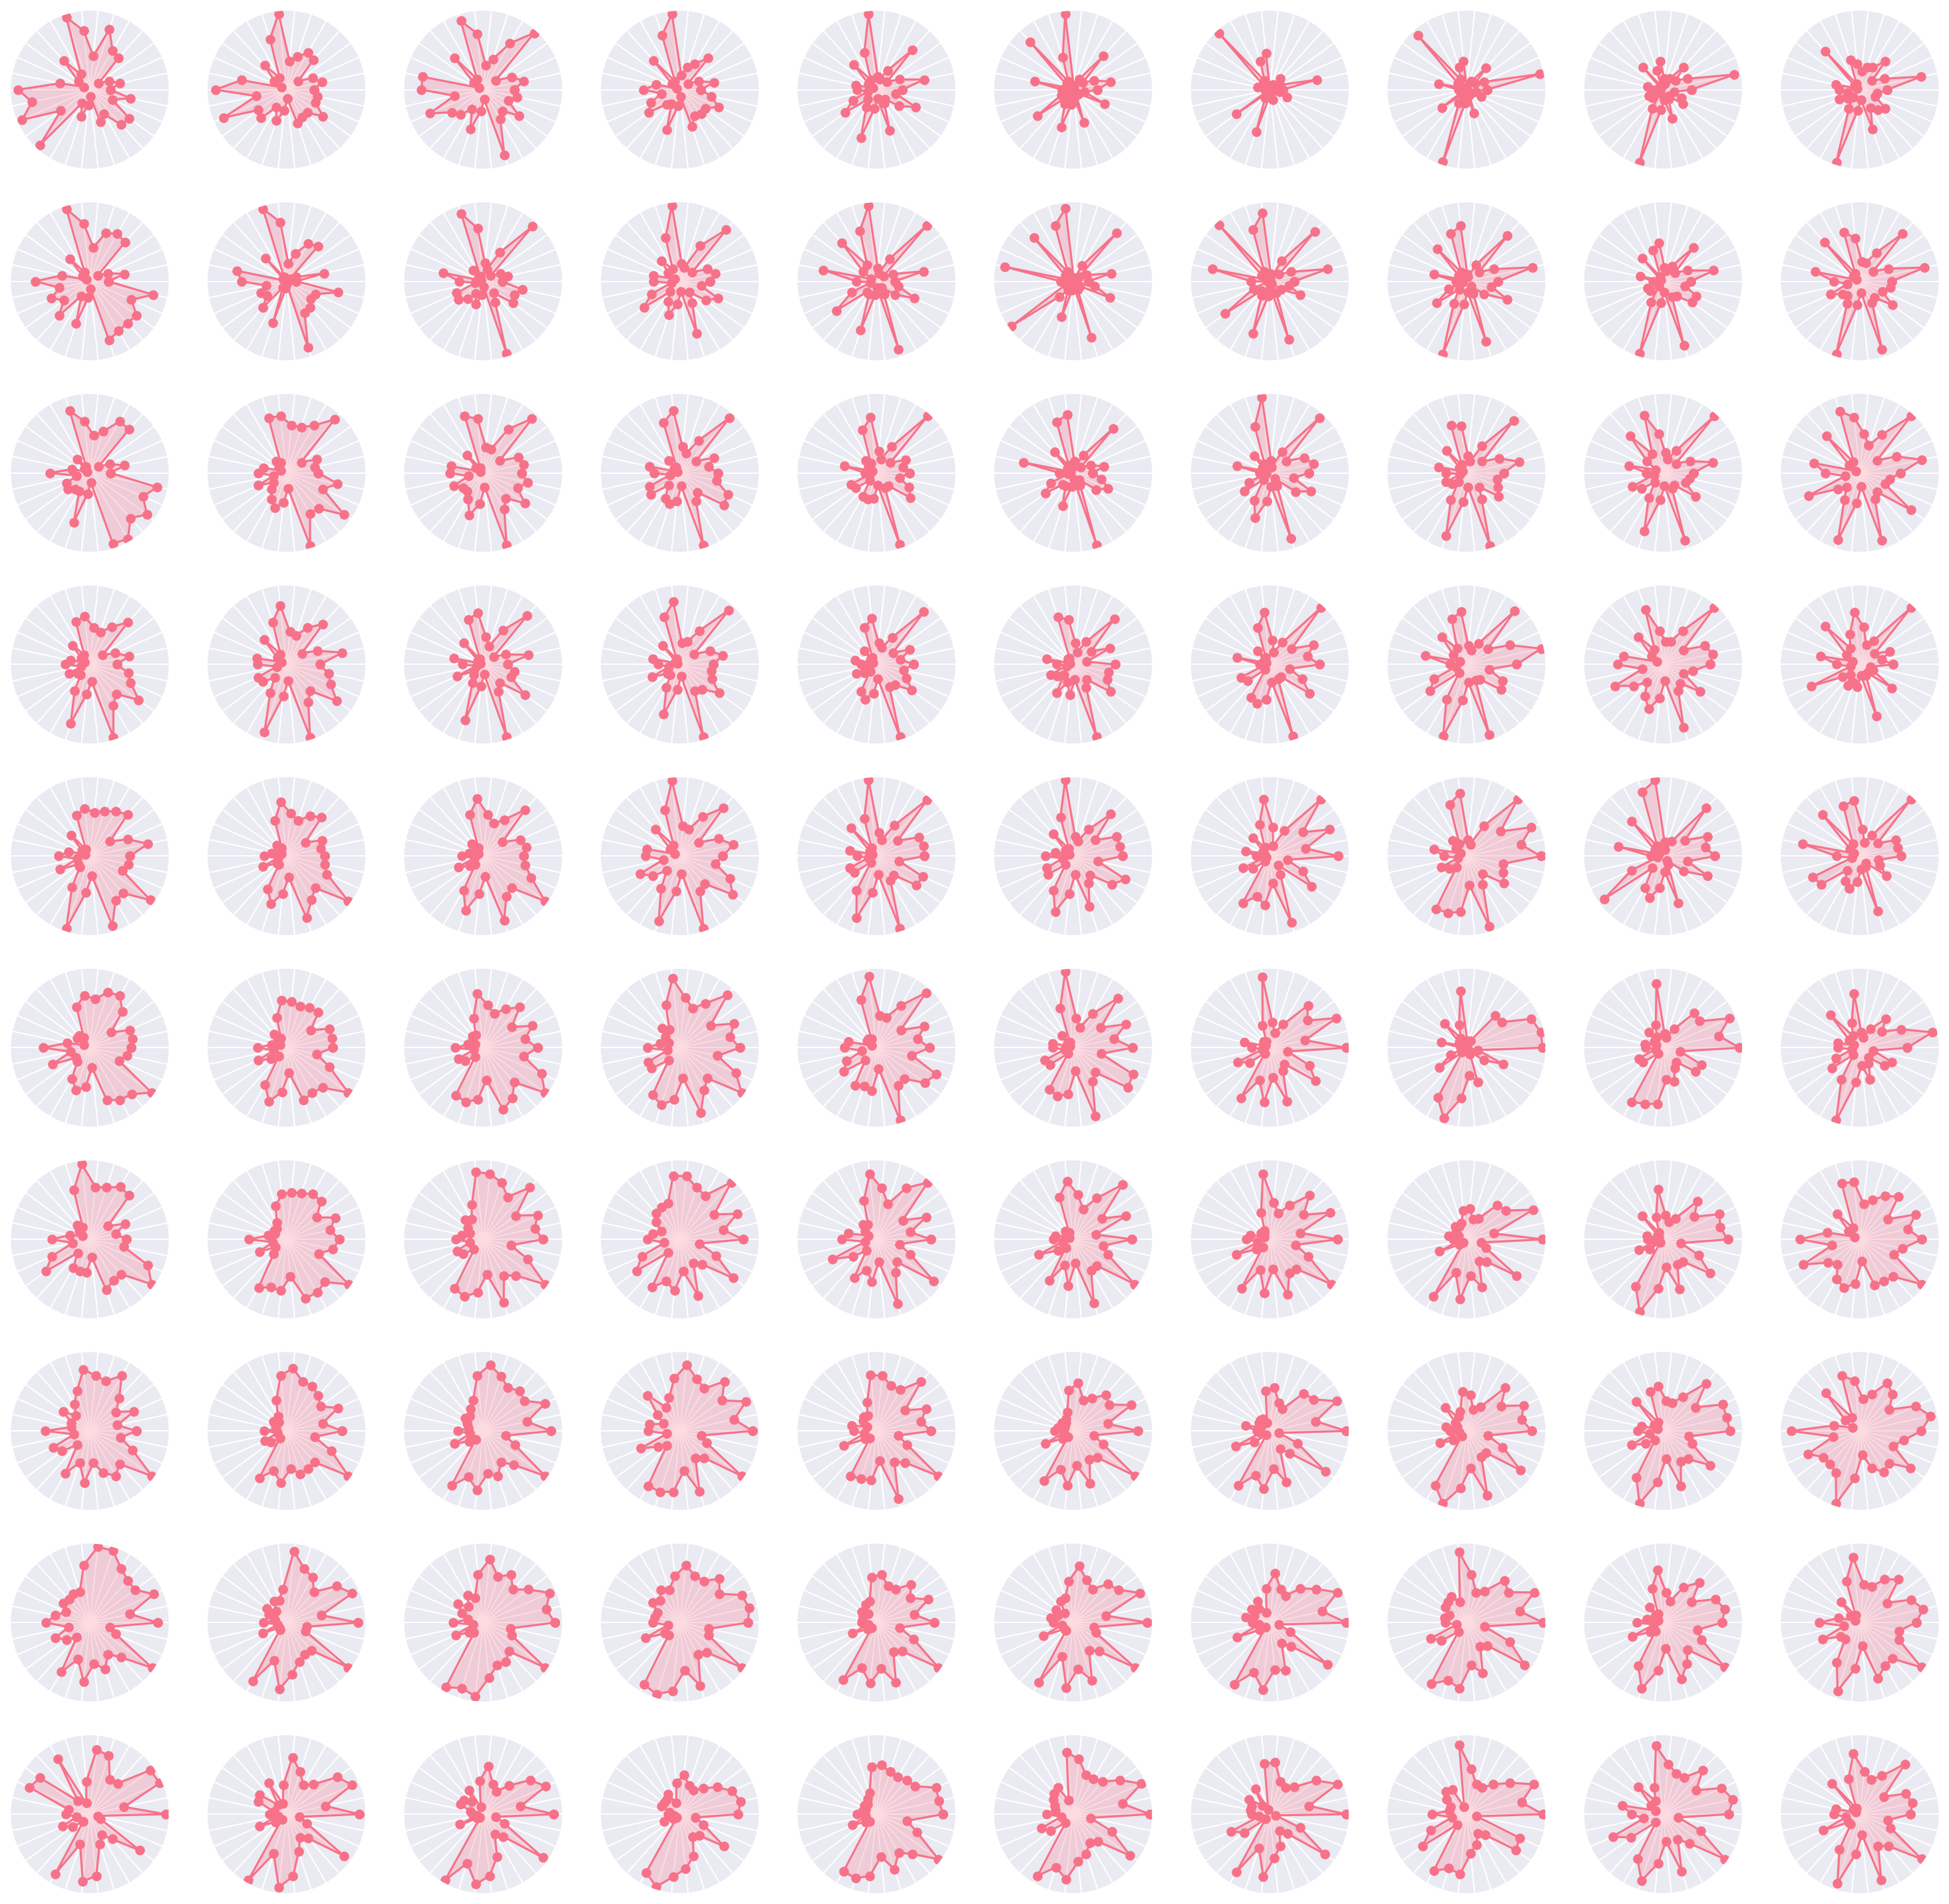

In [ ]:
make_radar_charts("Radar chart", sofm.weight, grid_height, grid_width)

Analizando el mapa de prototipos encontramos patrones similares, pero no se pueden discernir claramente regiones, esperamos que mejore en este aspecto al lograr una malla del tamaño correcto.

### **Resultados iniciales Counterpropagation**
Se entrena el modelo Perceptrón Simple con 30 iteraciones teniendo como entradas las salidas de SOM, lo que simula una red Counterpropagation:

In [ ]:
# Modeling Perceptron
# ------------
# Perceptron use de SOM output (grid array of 0 except winning output).
# That is, Counterpropagation Network (CPN)

max_iter_per = 30

print("Learning a Perceptron with %d maximum number of iterations and ..." % max_iter_per)

per = Perceptron(max_iter=max_iter_per, shuffle=False, random_state=0, verbose=True)
per.fit(sofm_output_train, target_train)

Learning a Perceptron with 30 maximum number of iterations and ...
-- Epoch 1
Norm: 14.35, NNZs: 90, Bias: 0.000000, T: 375, Avg. loss: 0.120000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 15.97, NNZs: 93, Bias: -1.000000, T: 750, Avg. loss: 0.037333
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.64, NNZs: 94, Bias: -1.000000, T: 1125, Avg. loss: 0.040000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 17.26, NNZs: 94, Bias: -2.000000, T: 1500, Avg. loss: 0.040000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 17.78, NNZs: 94, Bias: -2.000000, T: 1875, Avg. loss: 0.045333
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 18.33, NNZs: 94, Bias: -2.000000, T: 2250, Avg. loss: 0.042667
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 18.68, NNZs: 94, Bias: -3.000000, T: 2625, Avg. loss: 0.042667
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=30, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=True, warm_start=False)

Hemos observado que tras 7 iteraciones se logra la convergencia y para la ejecución, obteniendo un error promedio de `0.017794`.

In [ ]:
# Intitial results
# ------------
print("Printing initial results")

predict_train = per.predict(sofm_output_train)
predict_valid = per.predict(sofm_output_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Printing initial results
Train accuracy: 64.267%
Valid accuracy: 65.464%
Train confusion matrix:
[[233   0]
 [134   8]]
Valid confusion matrix:
[[124   0]
 [ 67   3]]
Train classification report:
              precision    recall  f1-score   support

       False       0.63      1.00      0.78       233
        True       1.00      0.06      0.11       142

    accuracy                           0.64       375
   macro avg       0.82      0.53      0.44       375
weighted avg       0.77      0.64      0.52       375

Valid classification report:
              precision    recall  f1-score   support

       False       0.65      1.00      0.79       124
        True       1.00      0.04      0.08        70

    accuracy                           0.65       194
   macro avg       0.82      0.52      0.43       194
weighted avg       0.78      0.65      0.53       194



Los resultados no son del todos buenos, pese a que hemos seguido los pasos expuestos y cumplido con las directrices expuestas en clase. Aun así hemos alcanzado un 74% en el conjunto de validación, valores que distan en gran medida de, por ejemplo, el 90% conseguido más adelante tras optimizar la arquitectura y obtener el número ideal de neuronas ocultas en la malla.

### **Optimización arquitectura SOM**
Para tratar de mejorar los resultados del CPN se estudia las dimensiones de la rejilla SOM más adecuadas. Hemos realizado una primera ejecución con los valores = '[5, 10, 15, 20, 25, 30, 35]' observando que se obtienen mejores resultados utilizando un número reducido de neuronas en la malla. Por lo tanto, hemos acabado utilizando los valores = '[1, 3, 5, 7, 9, 10, 20, 35]' donde centramos el foco de atención en mallas de entre 1 y 10 neuronas por fila y columna.

In [ ]:
# Architecture optimization
# ------------
print("Architecture optimization")

# Test SOM with differents number of grid units and several repetitions
tests_grid_side = [1, 3, 5, 7, 9, 10, 12, 15, 17, 20, 35]
n_reps = 5

now = datetime.now()
best_sofm = []
best_per = []
best_acc = 0.0
accs_train = []
accs_valid = []

for grid_side in tests_grid_side:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        utils.reproducible(random_state)
        sofm = algorithms.SOFM(n_inputs = input_train.shape[1], features_grid = (grid_side, grid_side), distance = distance, weight = weight, learning_radius = learning_radius, reduce_radius_after = max_iter_som // learning_radius, step = step, reduce_step_after = reduce_step_after, std = std, reduce_std_after = reduce_std_after, shuffle_data = False, verbose = False)
        sofm.train(input_train, epochs=max_iter_som)
        sofm_output_train = sofm.predict(input_train)
        sofm_output_valid = sofm.predict(input_valid)
        per = Perceptron(max_iter=max_iter_per, shuffle=False, random_state=random_state, verbose=False)
        _ = per.fit(sofm_output_train, target_train)
        acc_train = accuracy_score(target_train, per.predict(sofm_output_train))
        acc_valid = accuracy_score(target_valid,per.predict(sofm_output_valid))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f" % (random_state, acc_train, acc_valid))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_per = per
                best_sofm = sofm
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Grid size = %ix%i, train acc = %.8f, max valid acc = %.8f" % (grid_side, grid_side, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best CPN valid accuracy: %.8f%%" % (best_acc * 100))
print("Best SOM: ", best_sofm)
print("Best Perceptron: ", best_per)

Architecture optimization


Seed = 0, train acc = 0.62133333, valid acc = 0.63917526


Seed = 1, train acc = 0.62133333, valid acc = 0.63917526


Seed = 2, train acc = 0.62133333, valid acc = 0.63917526


Seed = 3, train acc = 0.62133333, valid acc = 0.63917526


Seed = 4, train acc = 0.62133333, valid acc = 0.63917526
Grid size = 1x1, train acc = 0.62133333, max valid acc = 0.63917526


Seed = 0, train acc = 0.91200000, valid acc = 0.91752577


Seed = 1, train acc = 0.91200000, valid acc = 0.91752577


Seed = 2, train acc = 0.91200000, valid acc = 0.91752577


Seed = 3, train acc = 0.91200000, valid acc = 0.91752577


Seed = 4, train acc = 0.91200000, valid acc = 0.91752577
Grid size = 3x3, train acc = 0.91200000, max valid acc = 0.91752577


Seed = 0, train acc = 0.93866667, valid acc = 0.93298969


Seed = 1, train acc = 0.93866667, valid acc = 0.93298969


Seed = 2, train acc = 0.93866667, valid acc = 0.93298969


Seed = 3, train acc = 0.93866667, valid acc = 0.93298969


Seed = 4, train acc = 0.93866667, valid acc = 0.93298969
Grid size = 5x5, train acc = 0.93866667, max valid acc = 0.93298969


Seed = 0, train acc = 0.76000000, valid acc = 0.75257732


Seed = 1, train acc = 0.80533333, valid acc = 0.78350515


Seed = 2, train acc = 0.96000000, valid acc = 0.93298969


Seed = 3, train acc = 0.76800000, valid acc = 0.72680412


Seed = 4, train acc = 0.93066667, valid acc = 0.90721649
Grid size = 7x7, train acc = 0.96000000, max valid acc = 0.93298969


Seed = 0, train acc = 0.67733333, valid acc = 0.66494845


Seed = 1, train acc = 0.97066667, valid acc = 0.95876289


Seed = 2, train acc = 0.67466667, valid acc = 0.65979381


Seed = 3, train acc = 0.96266667, valid acc = 0.94845361


Seed = 4, train acc = 0.65866667, valid acc = 0.68556701
Grid size = 9x9, train acc = 0.97066667, max valid acc = 0.95876289


Seed = 0, train acc = 0.64266667, valid acc = 0.65463918


Seed = 1, train acc = 0.73333333, valid acc = 0.72680412


Seed = 2, train acc = 0.67466667, valid acc = 0.65979381


Seed = 3, train acc = 0.64266667, valid acc = 0.65463918


Seed = 4, train acc = 0.73866667, valid acc = 0.76288660
Grid size = 10x10, train acc = 0.73866667, max valid acc = 0.76288660


Seed = 0, train acc = 0.68266667, valid acc = 0.68041237


Seed = 1, train acc = 0.69333333, valid acc = 0.71134021


Seed = 2, train acc = 0.68000000, valid acc = 0.68556701


Seed = 3, train acc = 0.68800000, valid acc = 0.67010309


Seed = 4, train acc = 0.65600000, valid acc = 0.69072165
Grid size = 12x12, train acc = 0.69333333, max valid acc = 0.71134021


Seed = 0, train acc = 0.92266667, valid acc = 0.84536082


Seed = 1, train acc = 0.72266667, valid acc = 0.71649485


Seed = 2, train acc = 0.90933333, valid acc = 0.87113402


Seed = 3, train acc = 0.75466667, valid acc = 0.75257732


Seed = 4, train acc = 0.92000000, valid acc = 0.83505155
Grid size = 15x15, train acc = 0.90933333, max valid acc = 0.87113402


Seed = 0, train acc = 0.93600000, valid acc = 0.85567010


Seed = 1, train acc = 0.98400000, valid acc = 0.90206186


Seed = 2, train acc = 0.90933333, valid acc = 0.84536082


Seed = 3, train acc = 0.98133333, valid acc = 0.88144330


Seed = 4, train acc = 0.90133333, valid acc = 0.85567010
Grid size = 17x17, train acc = 0.98400000, max valid acc = 0.90206186


Seed = 0, train acc = 0.98400000, valid acc = 0.80927835


Seed = 1, train acc = 0.98400000, valid acc = 0.85051546


Seed = 2, train acc = 0.87733333, valid acc = 0.78865979


Seed = 3, train acc = 0.91733333, valid acc = 0.76804124


Seed = 4, train acc = 0.99200000, valid acc = 0.81958763
Grid size = 20x20, train acc = 0.98400000, max valid acc = 0.85051546


Seed = 0, train acc = 1.00000000, valid acc = 0.72164948


Seed = 1, train acc = 1.00000000, valid acc = 0.74226804


Seed = 2, train acc = 0.99733333, valid acc = 0.75257732


Seed = 3, train acc = 0.92266667, valid acc = 0.73195876


Seed = 4, train acc = 1.00000000, valid acc = 0.74226804
Grid size = 35x35, train acc = 0.99733333, max valid acc = 0.75257732
Number of seconds for training: 1158
Best CPN valid accuracy: 95.87628866%
Best SOM:  SOFM(verbose=False, step=0.5, show_epoch=1, shuffle_data=False, signals=None, n_inputs=30, n_outputs=81, weight=(30, 81), features_grid=[9, 9], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=2, std=1.0, reduce_radius_after=62, reduce_std_after=120, reduce_step_after=120)
Best Perceptron:  Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=30, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=False, warm_start=False)


Se observa que la mejor rejilla encontrada resulta ser de 9x9 neuronas en la capa oculta aunque obteniendo la misma precisión de validación que utilizando 10x10 neuronas en la capa oculta. Se visualizan los resultados de errores obtenidos con las distintas arquitecturas estudiadas.

Se puede apreciar que con tamaños cada vez mayores obtenemos peor precisión, como es el ejemplo de 20x20 y 35x35. Ocurre lo mismo para el tamaño mínimo que sería 1x1.

In [ ]:
df_1 = pd.DataFrame()
df_1["Number of hidden units"] = tests_grid_side
df_1["Error(%)"] = 100 *(1- np.array(accs_train))
df_1["Category"] = "Train"

df_2 = pd.DataFrame()
df_2["Number of hidden units"] = tests_grid_side
df_2["Error(%)"] = 100 *(1- np.array(accs_valid))
df_2["Category"] =  "Valid"

display_df = pd.concat([df_1, df_2])

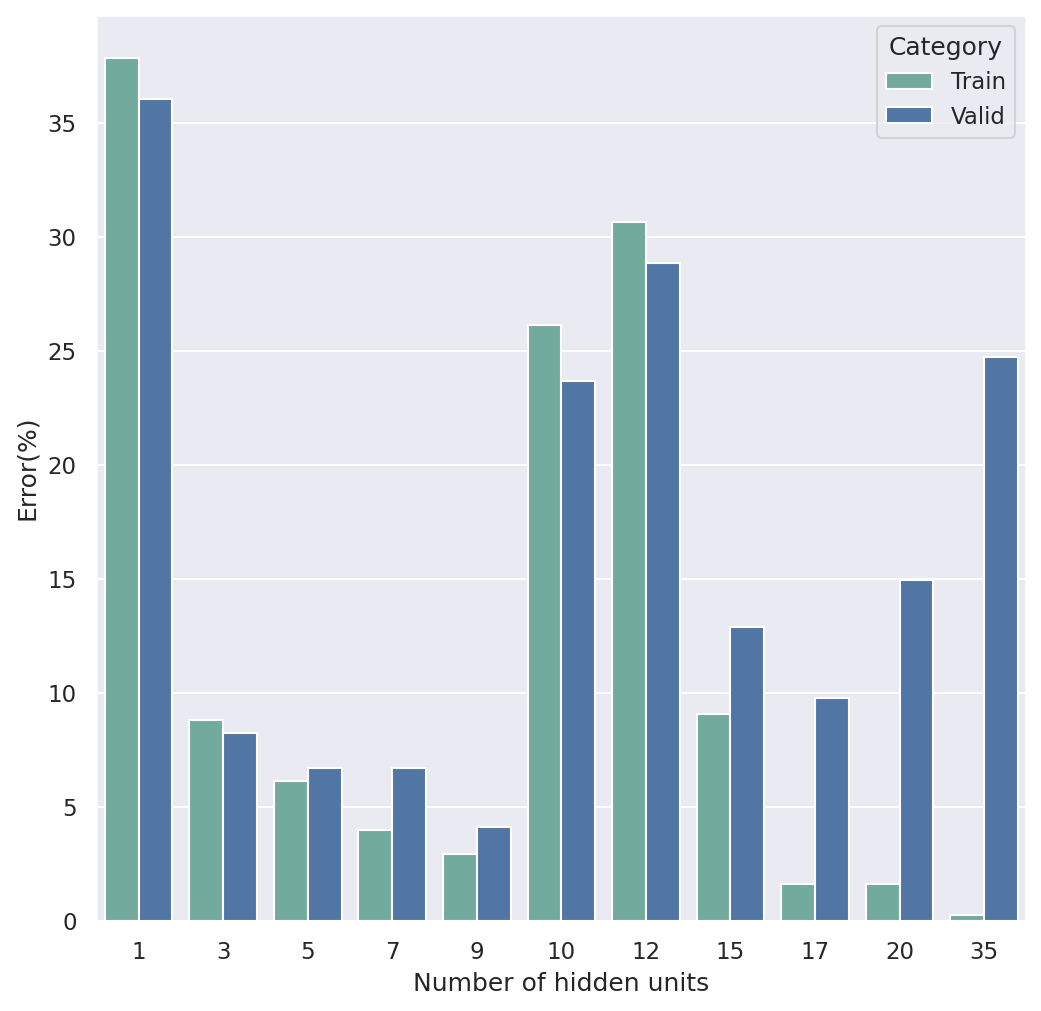

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Set the colors
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# grouped barplot
# sns.barplot(x="day", y="total_bill", hue="smoker", data=display_df, ci=None);
sns.barplot(x="Number of hidden units", y="Error(%)", hue="Category", data=display_df, ci=None);
sns.set_palette(sns.color_palette("Set1"))

### Resultados finales mejor CPN
Se calculan los resultados finales para el mejor CPN obtenido, incluido el conjunto de test.

In [ ]:
print("Printing final results")
print(best_sofm)
sofm_output_train = best_sofm.predict(input_train)
sofm_output_valid = best_sofm.predict(input_valid)
sofm_output_test = best_sofm.predict(input_test)
predict_train = best_per.predict(sofm_output_train)
predict_valid = best_per.predict(sofm_output_valid)
predict_test = best_per.predict(sofm_output_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test)) 

Printing final results
SOFM(verbose=False, step=0.5, show_epoch=1, shuffle_data=False, signals=None, n_inputs=30, n_outputs=81, weight=(30, 81), features_grid=[9, 9], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=2, std=1.0, reduce_radius_after=62, reduce_std_after=120, reduce_step_after=120)
Train accuracy: 97.067%
Valid accuracy: 95.876%
Test accuracy: 95.070%
Train confusion matrix:
[[231   2]
 [  9 133]]
Valid confusion matrix:
[[122   2]
 [  6  64]]
Test confusion matrix:
[[83  2]
 [ 5 52]]
Train classification report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       233
        True       0.99      0.94      0.96       142

    accuracy                           0.97       375
   macro avg       0.97      0.96      0.97       375
weighted avg       0.97      0.97      0.97       375

Valid classification report:
          

Se observa que los resultados finales del mejor CPN obtenido para el conjunto de validación mejoran en gran medida respecto al los resultados iniciales en un 18%, mejorando muchísimo la generalización respecto al CPN inicial. El error final parar el conjunto de test es un 1,3% peor que el conjunto de validación.


### Curvas Roc


Se muestran también las curvas ROC para el conjunto de test, donde observamos que se obtiene un `AUC` del 96,48%, que es cercano a la precisión obtenida en el conjunto de test del 92,95%

Printing ROC curves of test set


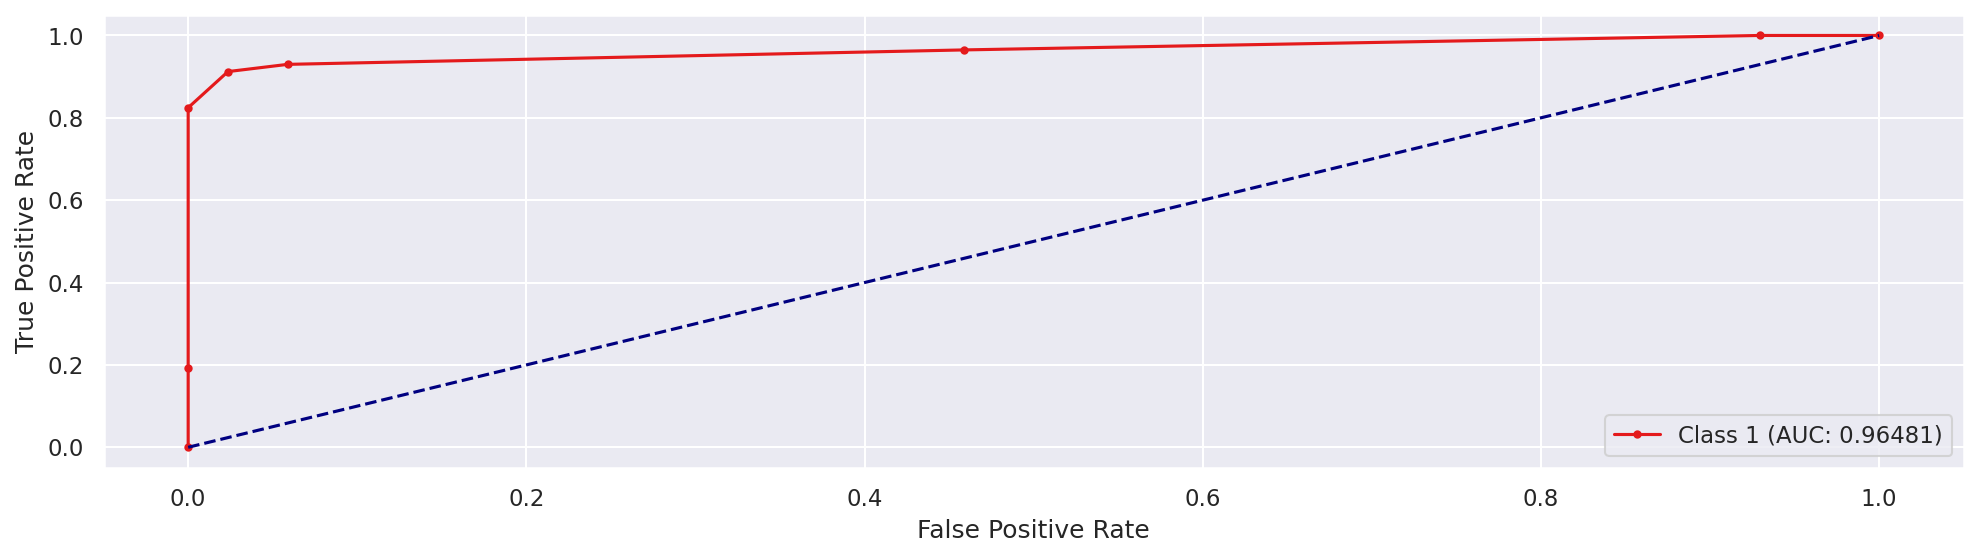

In [ ]:
# ROC curves of test set
per_probs = best_per.decision_function(sofm_output_test)

per_auc = []
per_fpr = []
per_tpr = []

per_auc.append(roc_auc_score(target_test==True, per_probs))
fpr, tpr, _ = roc_curve(target_test==True, per_probs)
per_fpr.append(fpr)
per_tpr.append(tpr)

print("Printing ROC curves of test set")
# plot the roc curve for the model
_ = plt.plot(per_fpr[0], per_tpr[0], marker='.', label='Class %d (AUC: %.5f)' % (True, per_auc[0]))

# axis labels
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Visualización de prototipos tras optimizar la arquitectura

Finalmente podemos observar que ahora sí se logran diferenciar ciertos patrones tras haber encontrado el número ideal de neuronas en la capa oculta.

Progress: 0.00%
Progress: 11.11%
Progress: 22.22%
Progress: 33.33%
Progress: 44.44%
Progress: 55.56%
Progress: 66.67%
Progress: 77.78%
Progress: 88.89%


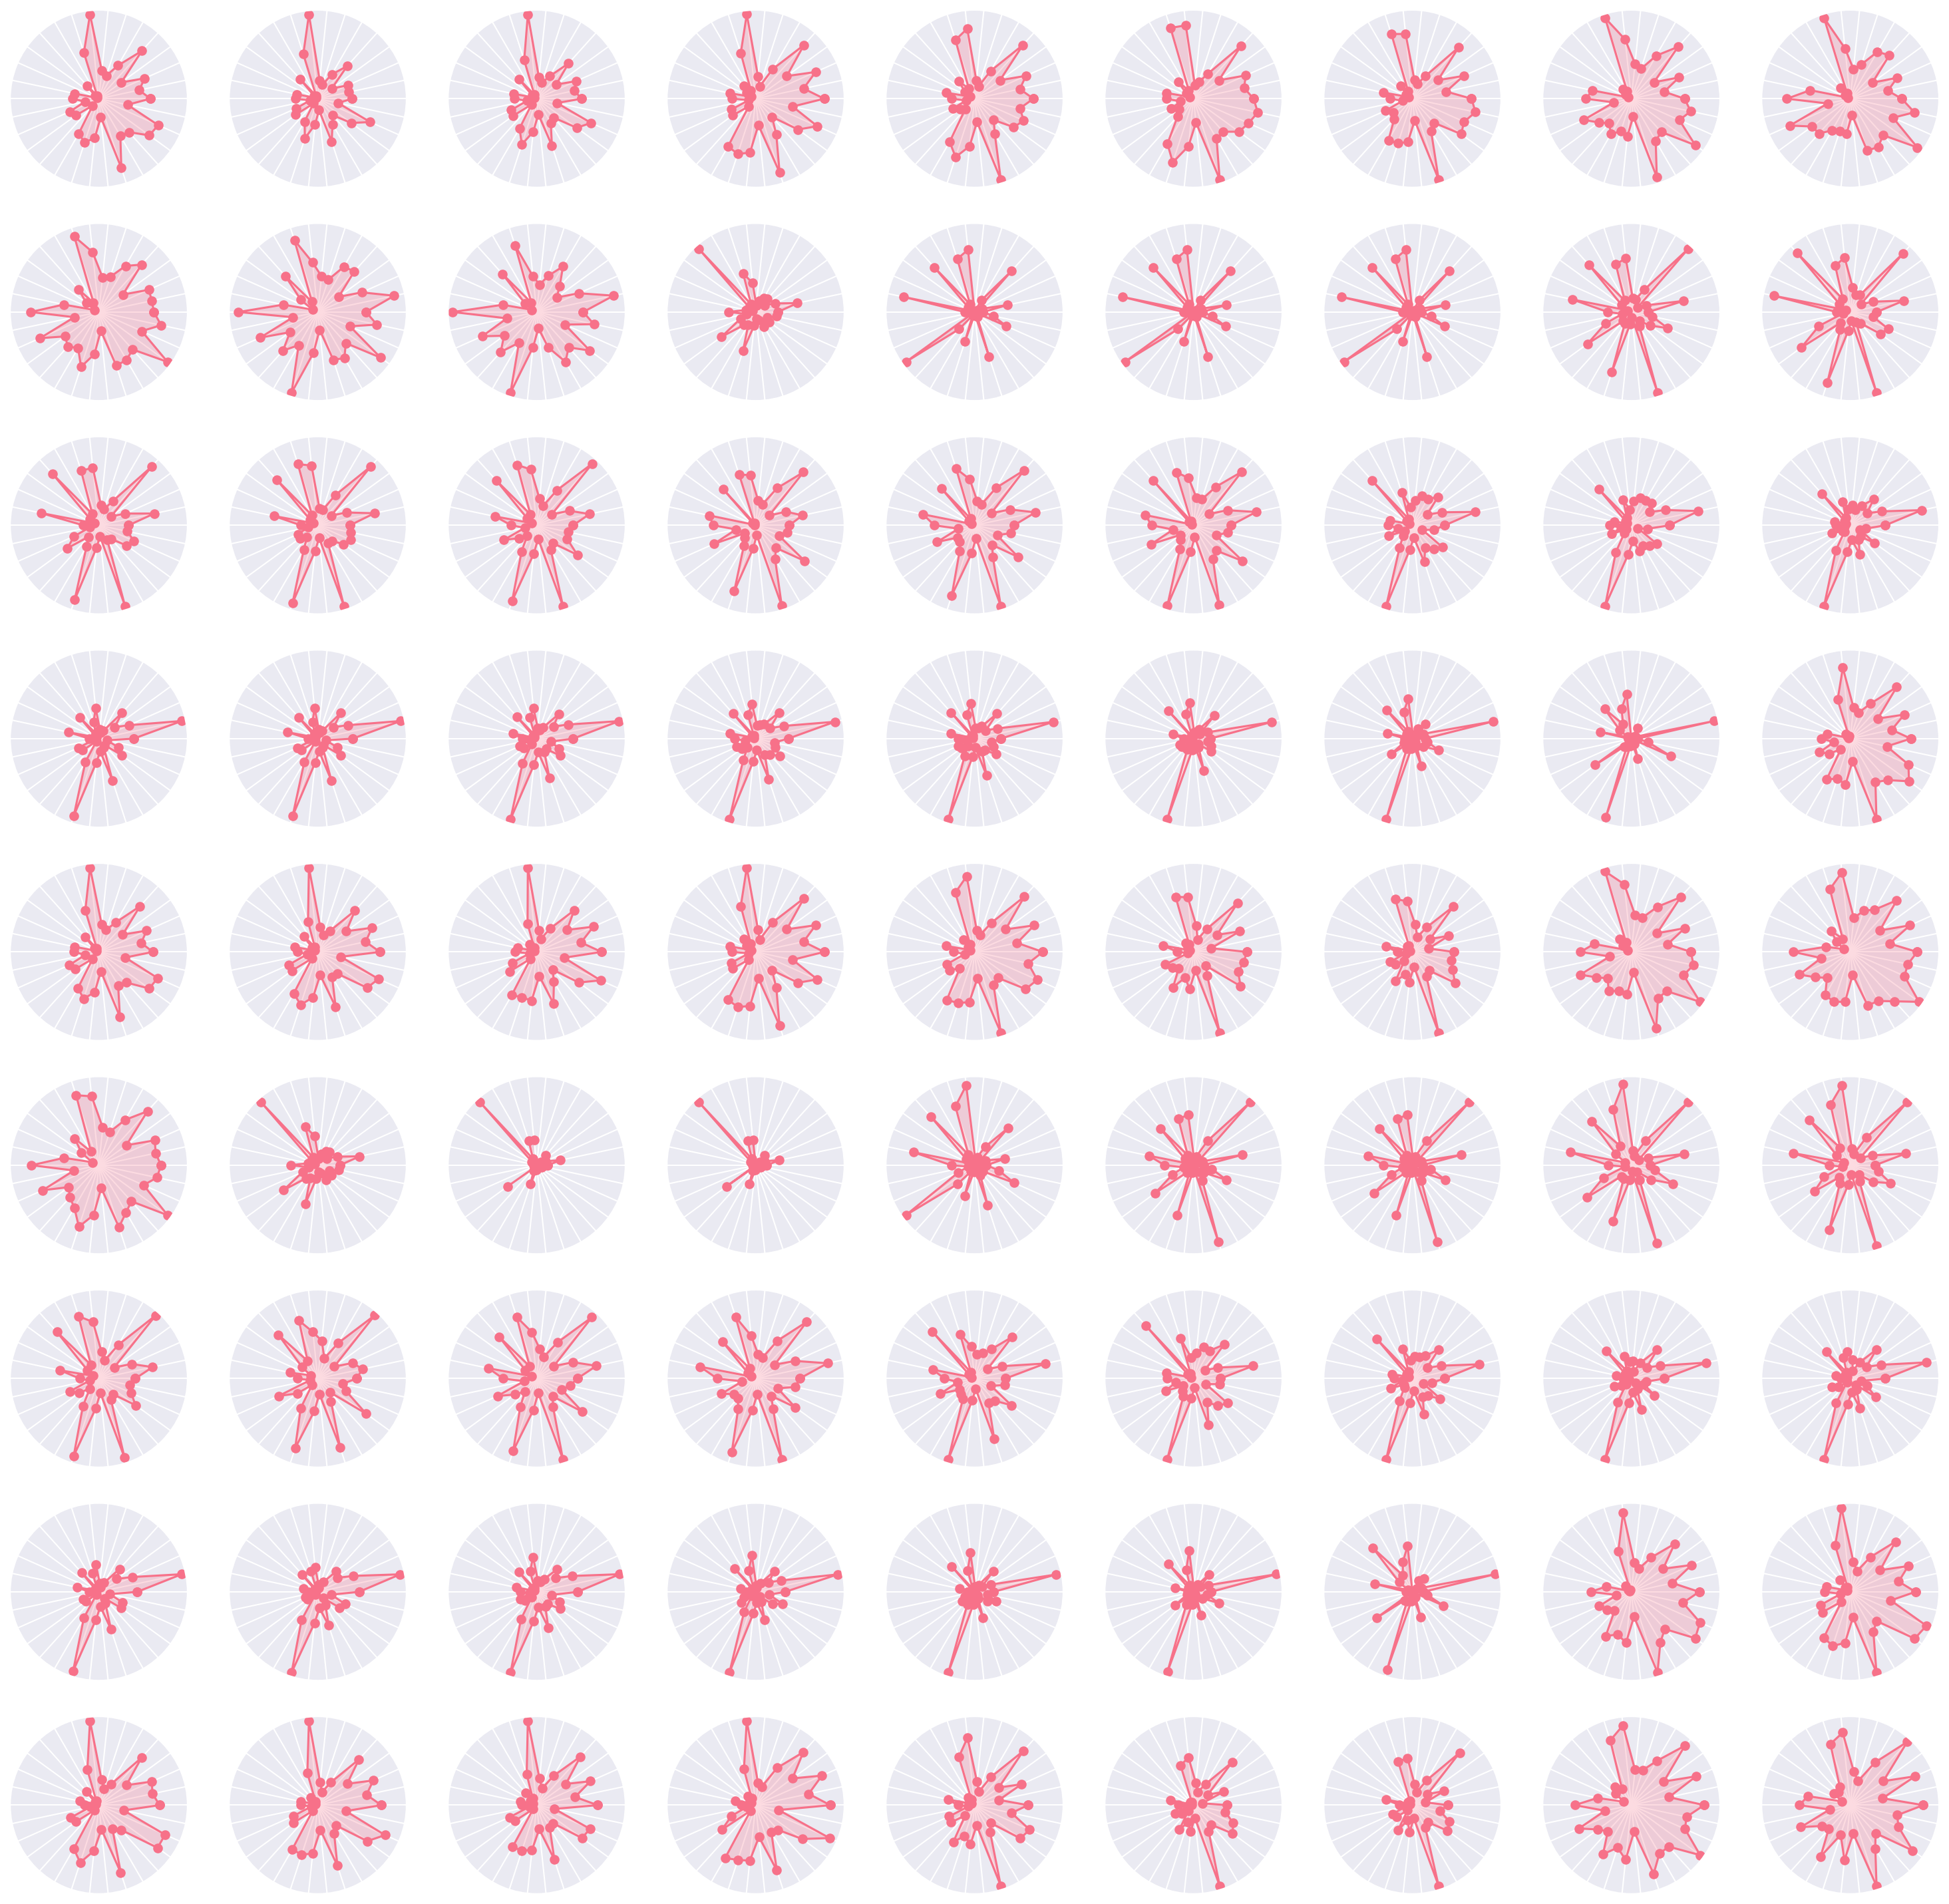

In [ ]:
# Show grid prototypes
make_radar_charts("Radar chart", sofm.weight, best_sofm.features_grid[0], best_sofm.features_grid[1])

## Conclusiones


A continuación, se listan las principales conclusiones extraidas de cada uno de los temas abordados anteriormente. 

En el estudio de *Clasificación*, expuesto en el segundo apartado de este documento, logramos deducir que:
* Con el filtro de variables redundantes obtenemos resultados parecidos al inicial.
* La clasificación del árbol de decisión y el bayesiano dan resultados similares.
* En los árboles de clasificación, la variable concave points_mean refleja una gran importancia.

Del *Agrupamiento*, tanto basado en prototipos, jerárquico y basado en densidad, concluimos que:
* Reducir el número de variables facilita que se logren mejores agrupamiento, dado los datos que disponemos.
* Debido a que la base de datos cuenta con un número considerable de variables y de un número reducido de muestras es complicado concluir un buen agrupamiento.

El estudio del modelo *Generalizations with Self Organizing Maps* no ha supuesto una mejora en los resultados en cuanto el empleo de mapas auto organizados, respecto a los resultados obtenidos mediante la utilización de perceptrones multi-capa. Además, la visualización de los prototipos es correcta, y aunque es mejorable resulta interesante apreciar los distintos patrones que se producen en las mallas.

En el *Multi Layer Perceptron*, hemos conseguido una precisión de 97,8%. Por este motivo podemos considerar, al *Perceptrón Multicapa* como la mejor herramienta de clasificación empleada en este estudio.

Según el *Fondo mundial para la investigación de cáncer*, el cáncer de mama actualmente representa 1 de cada 4 de todos los cánceres en mujeres de todo el mundo. La *Organización mundial de la salud*, estima para el 2025 habrá hasta 2,5 millones de nuevos casos y 800 000 muertes. Además, un estudio estudio dirigido por *Louise Brinton* y *Michael B. Cook*. 

Con estos datos, hemos reflexionado eticamente respecto el proyecto. Este proyecto nos ha hecho darnos cuenta de la importancia de los estudios de muestras para la salud pública. La importancia que puede llegar a suponer responder con efectividad las dos preguntas planteadas en la introducción, podrían ser capaces de salvar vidas. Conseguir determinar lo factores que decretan que las muestras sean malignas, podría llegar a prolongar las vidas de los pacientes que la sufren. 



## Referencias

* [Base de datos](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

* [Preprocesado de datos](https://campusingenieriaytecnologia.ull.es/pluginfile.php/361162/mod_resource/content/1/PreprocesadoDatos.pdf)

* [Redes Neuronales](http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t8neuronales.pdf)

* [Agrupamiento mediante redes neuronales](https://campusingenieriaytecnologia.ull.es/pluginfile.php/347336/mod_resource/content/7/Agrupamiento_mediante_redes_neuronales.pdf)

* [Presentación defensa del proyecto](https://docs.google.com/presentation/d/1laPXZNDey8yAPL5pZrzNezINV6-iJxjN8ufL062k1ZU/edit?usp=sharing)
